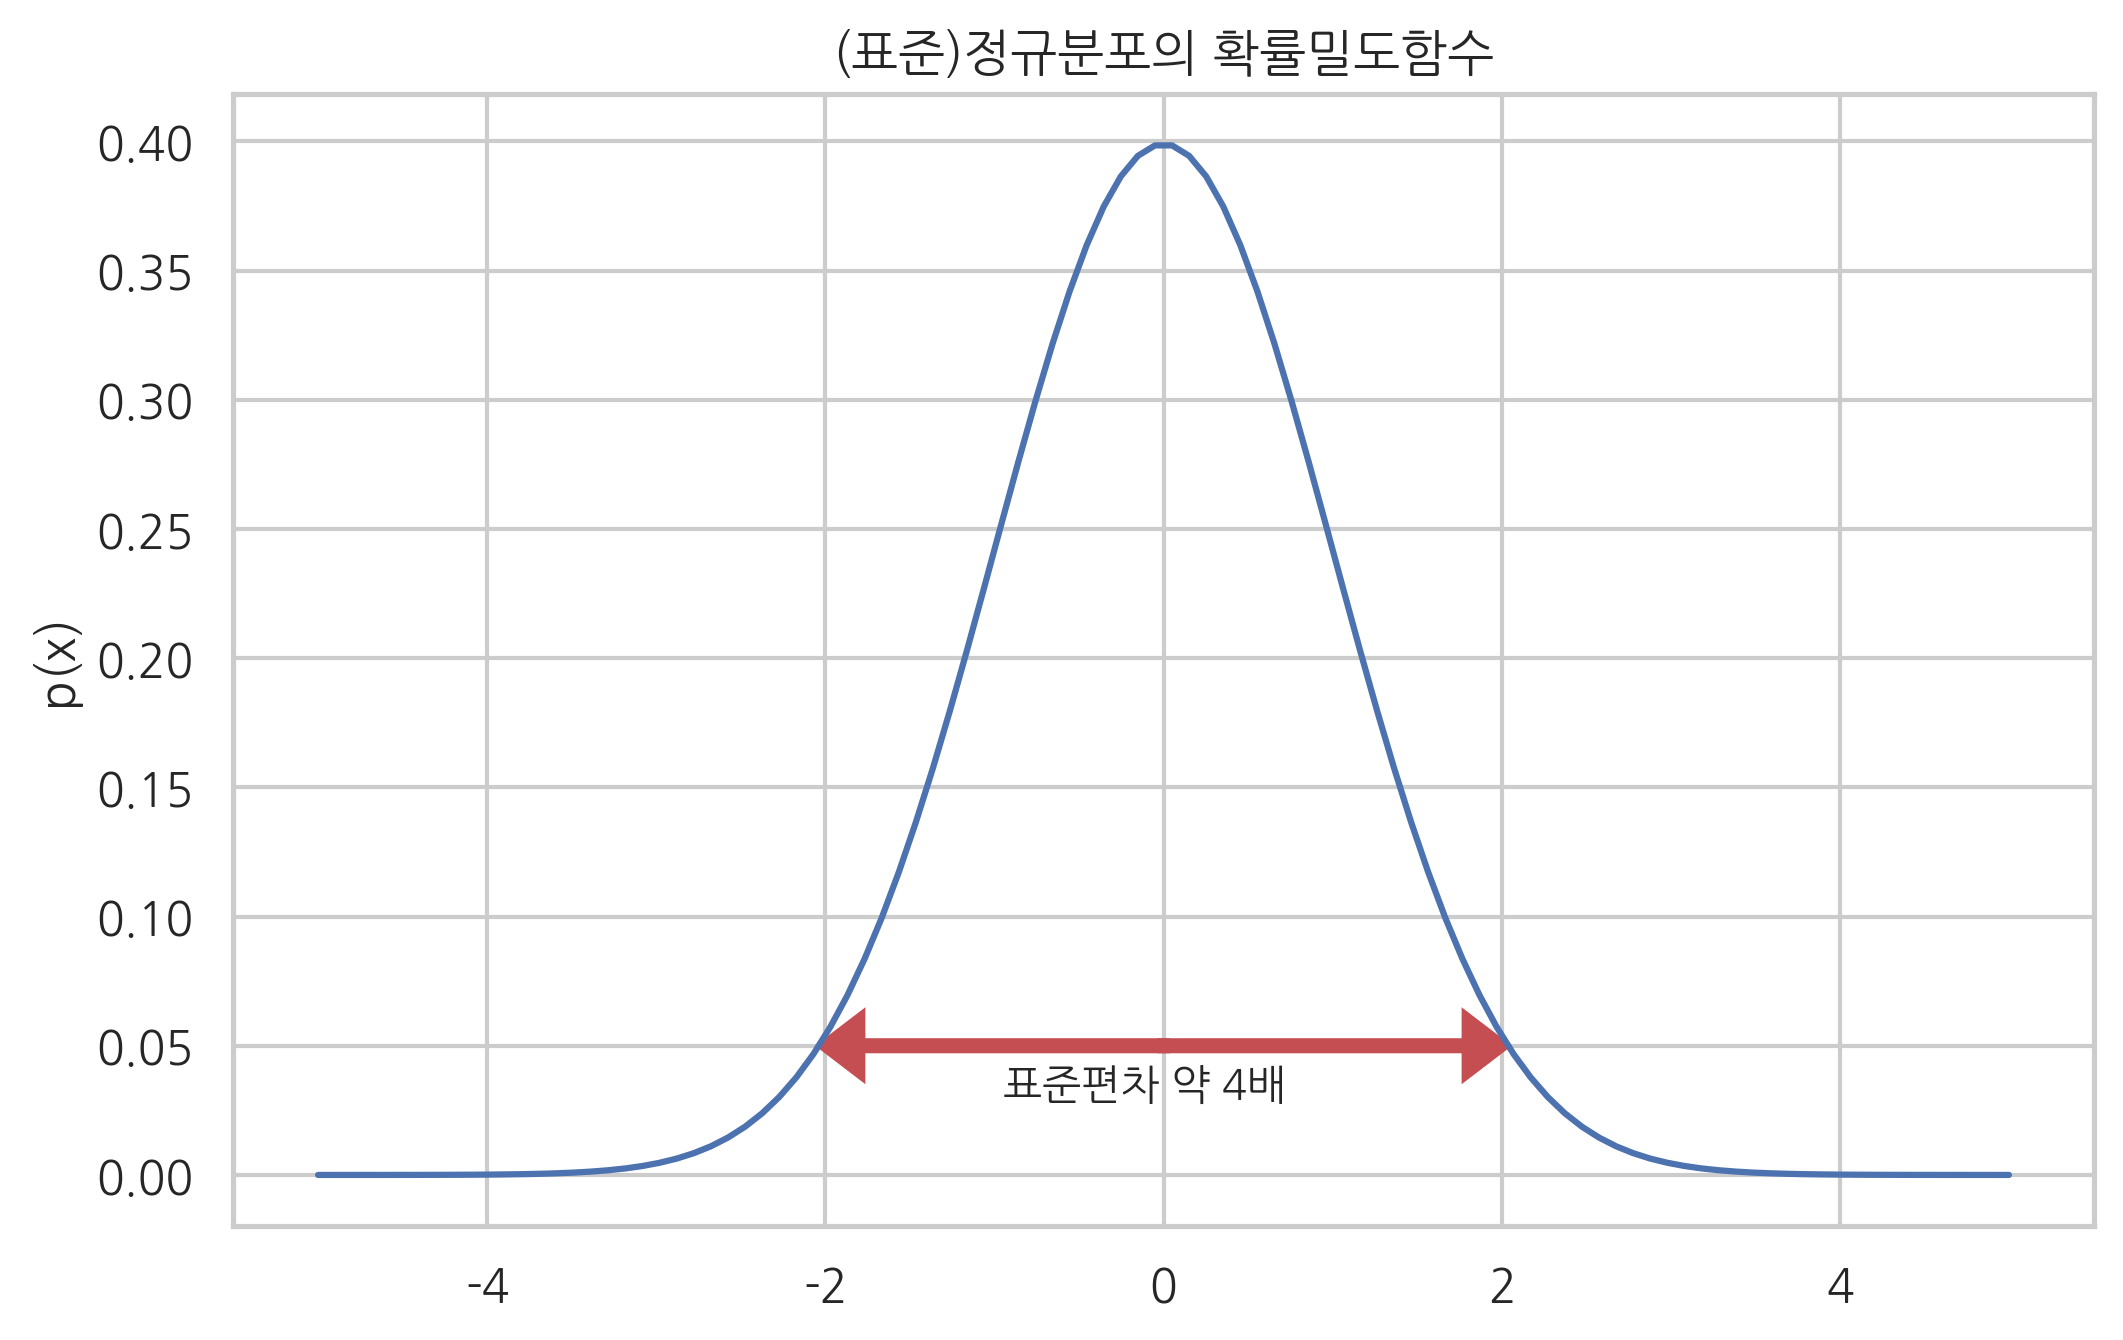

In [6]:
import scipy as sp
# standard normal distribution
mu = 0
std = 1
rv = sp.stats.norm(mu, std) # 표준정규분포

xx = np.linspace(-5,5,100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0,0.05, 2,0,lw=3, color='r',
         head_width=0.02, head_length=0.2,length_includes_head=True)
plt.arrow(0,0.05, -2, 0, lw = 3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, '표준편차 약 4배')
plt.ylabel('p(x)')
plt.title('(표준)정규분포의 확률밀도함수')
plt.show()

In [10]:
# 시뮬레이션 20번 해서 정규분포 표본 얻기 
x = rv.rvs(20, random_state=0)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

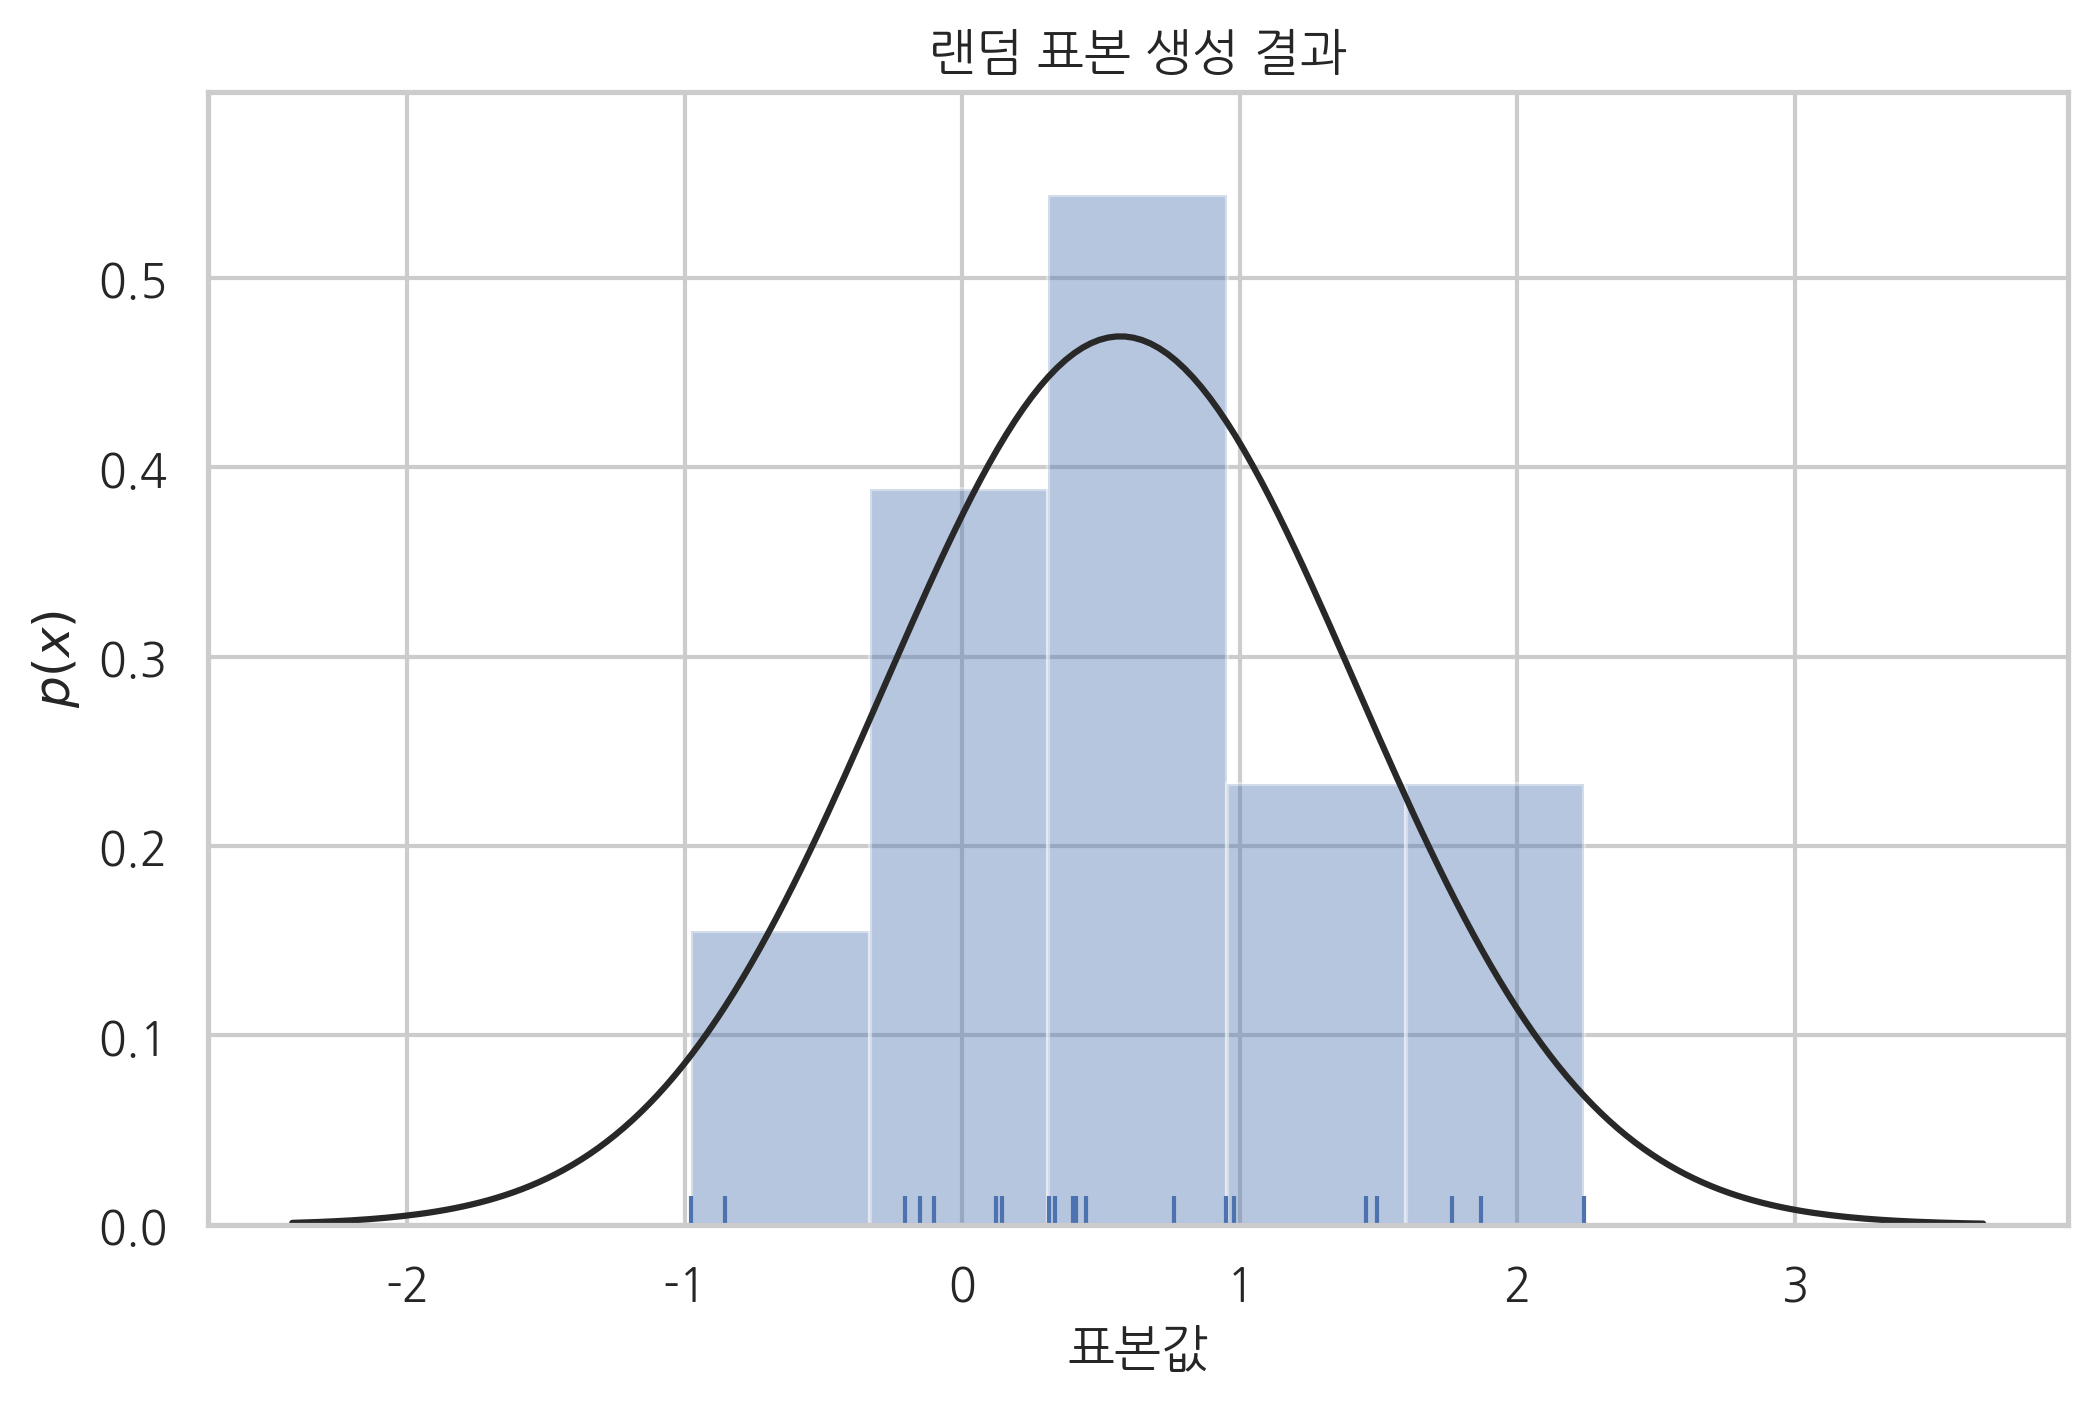

In [34]:
sns.distplot(x,  rug=True, kde=False,fit=sp.stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$p(x)$')
plt.show()

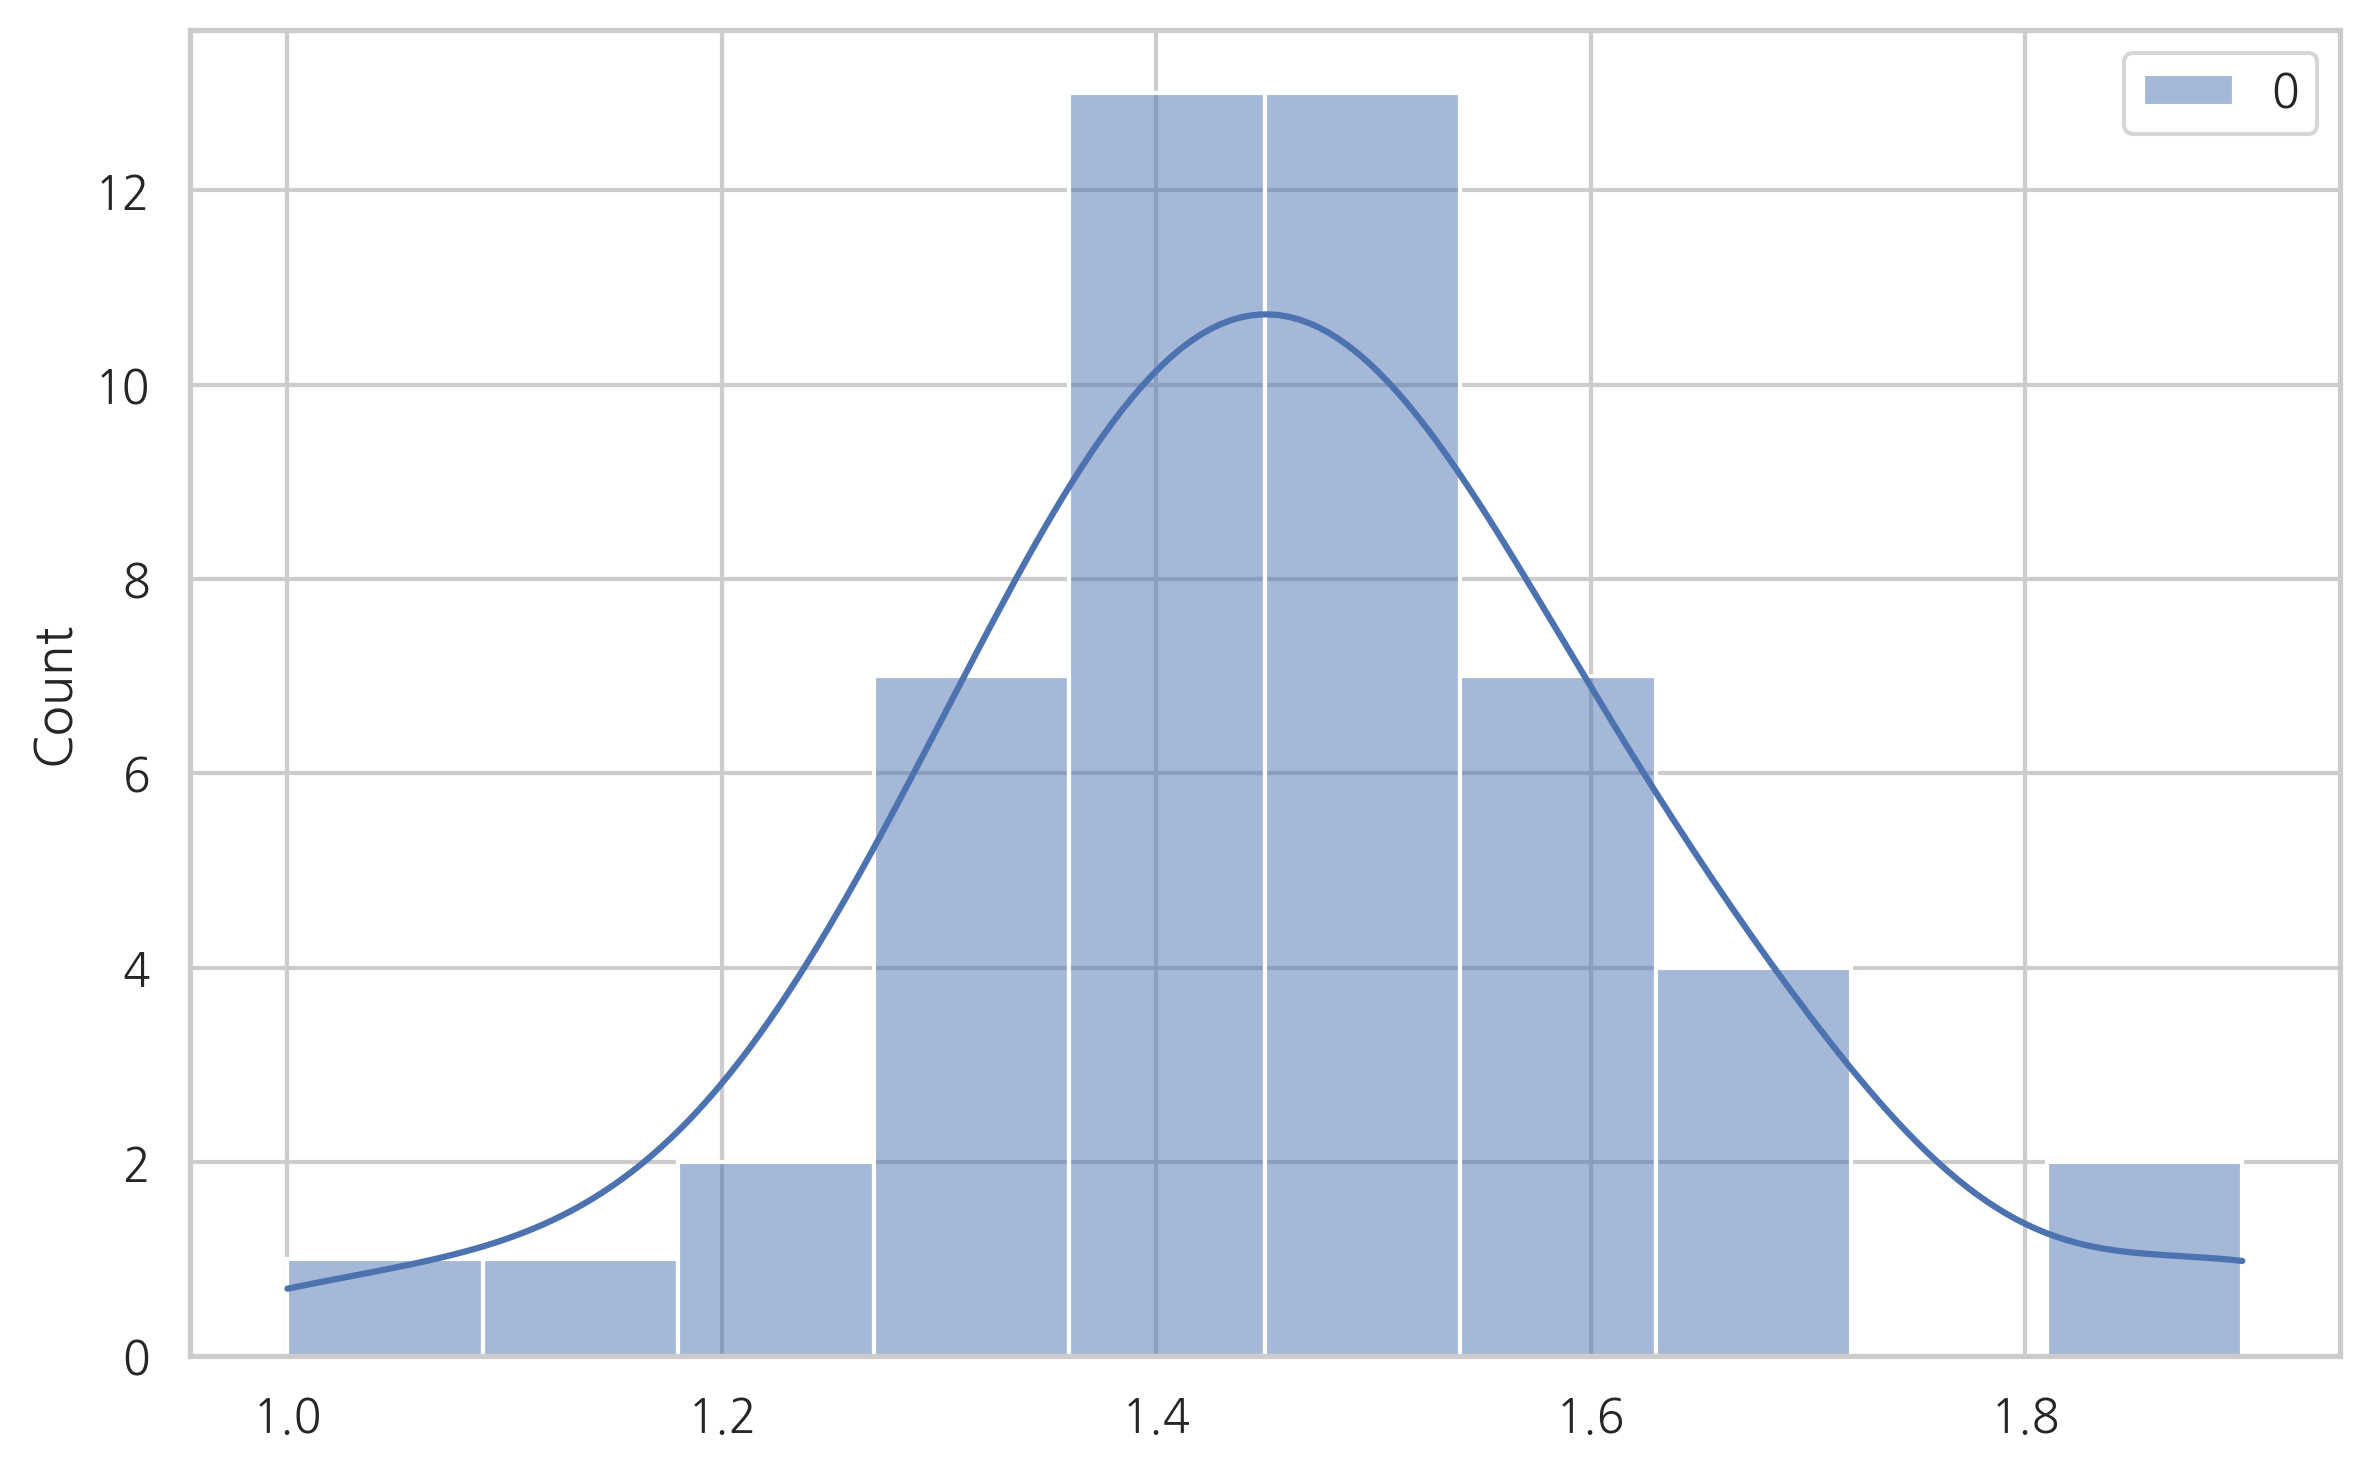

In [86]:
from sklearn.datasets import load_iris
X = load_iris().data

df = pd.DataFrame(X, columns=load_iris().feature_names)
df['종'] = load_iris().target
setosa_petal_length = df[df['종'] == 0][['petal length (cm)']]
sns.histplot(setosa_petal_length.values, kde=True)
plt.tight_layout()
plt.show()


# 붓꽃 데이터 분포가 정규분포와 비슷한 형상 보인다.

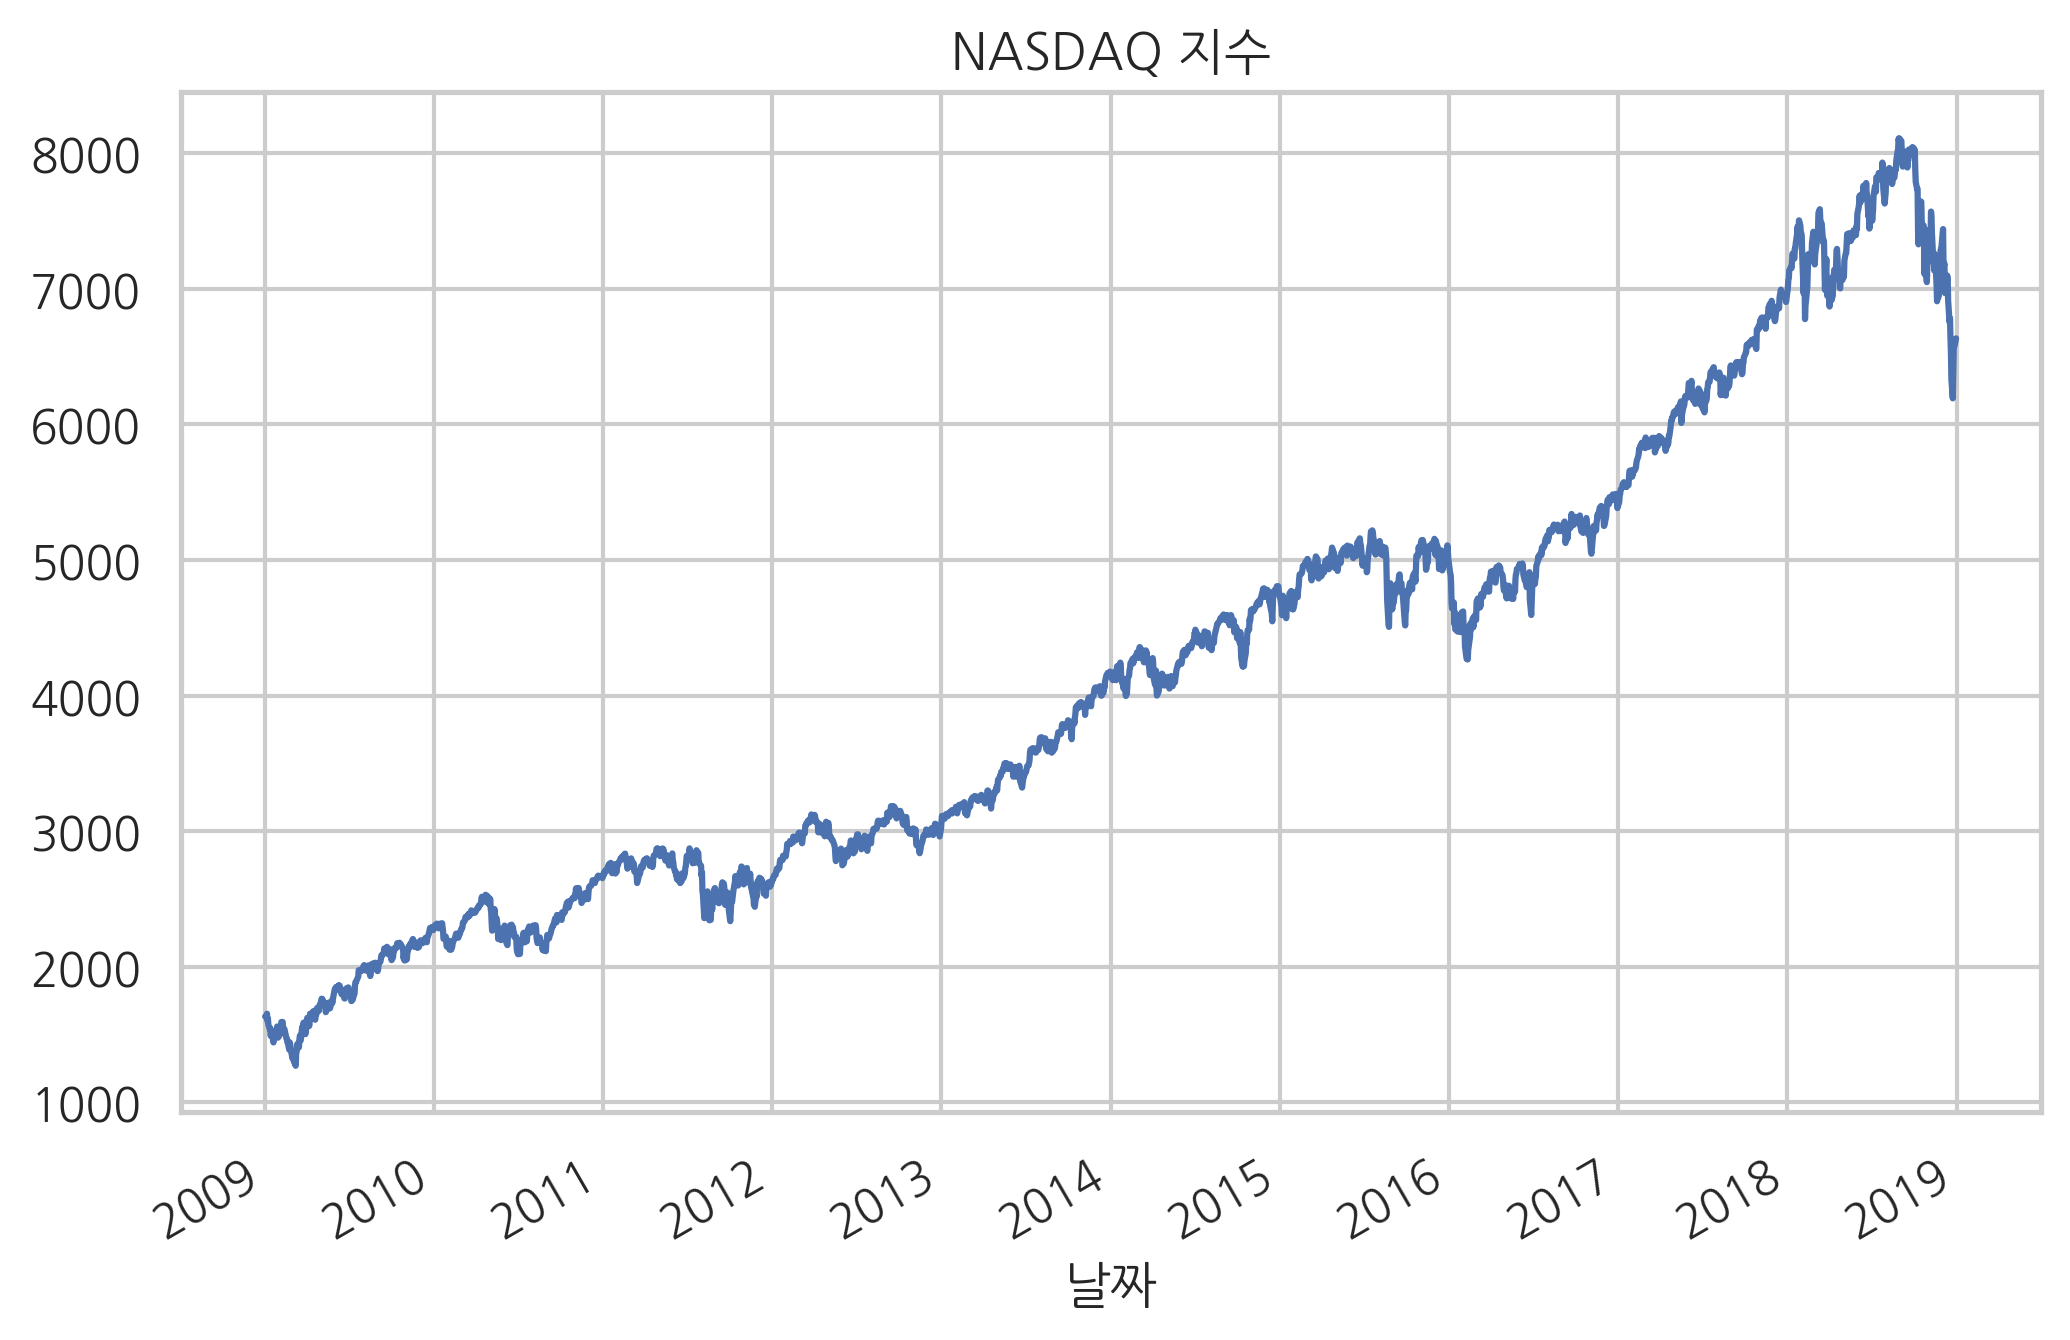

In [11]:
import pandas_datareader.data as web

symbol = 'NASDAQCOM'
data = pd.DataFrame()
data[symbol] = web.DataReader(symbol, data_source='fred', start='2009-01-01',end='2018-12-31')[symbol]
data = data.dropna() # null값 행 제거
data.plot(legend=False)
plt.xlabel('날짜')
plt.title('NASDAQ 지수')
plt.show()

In [12]:
#10년간 평균 일간 수익률
daily_returns = data.pct_change().dropna() #10년치 일간수익률
mean = daily_returns.mean().values[0] # 일간수익률 평균
std = daily_returns.std().values[0] # 일간수익률 표준편차 == 변동성
print(f'평균 일간수익률 : {mean*100:3.2f}%')
print(f'평균 일간변동성 : {std*100:3.2f}%')

평균 일간수익률 : 0.06%
평균 일간변동성 : 1.17%


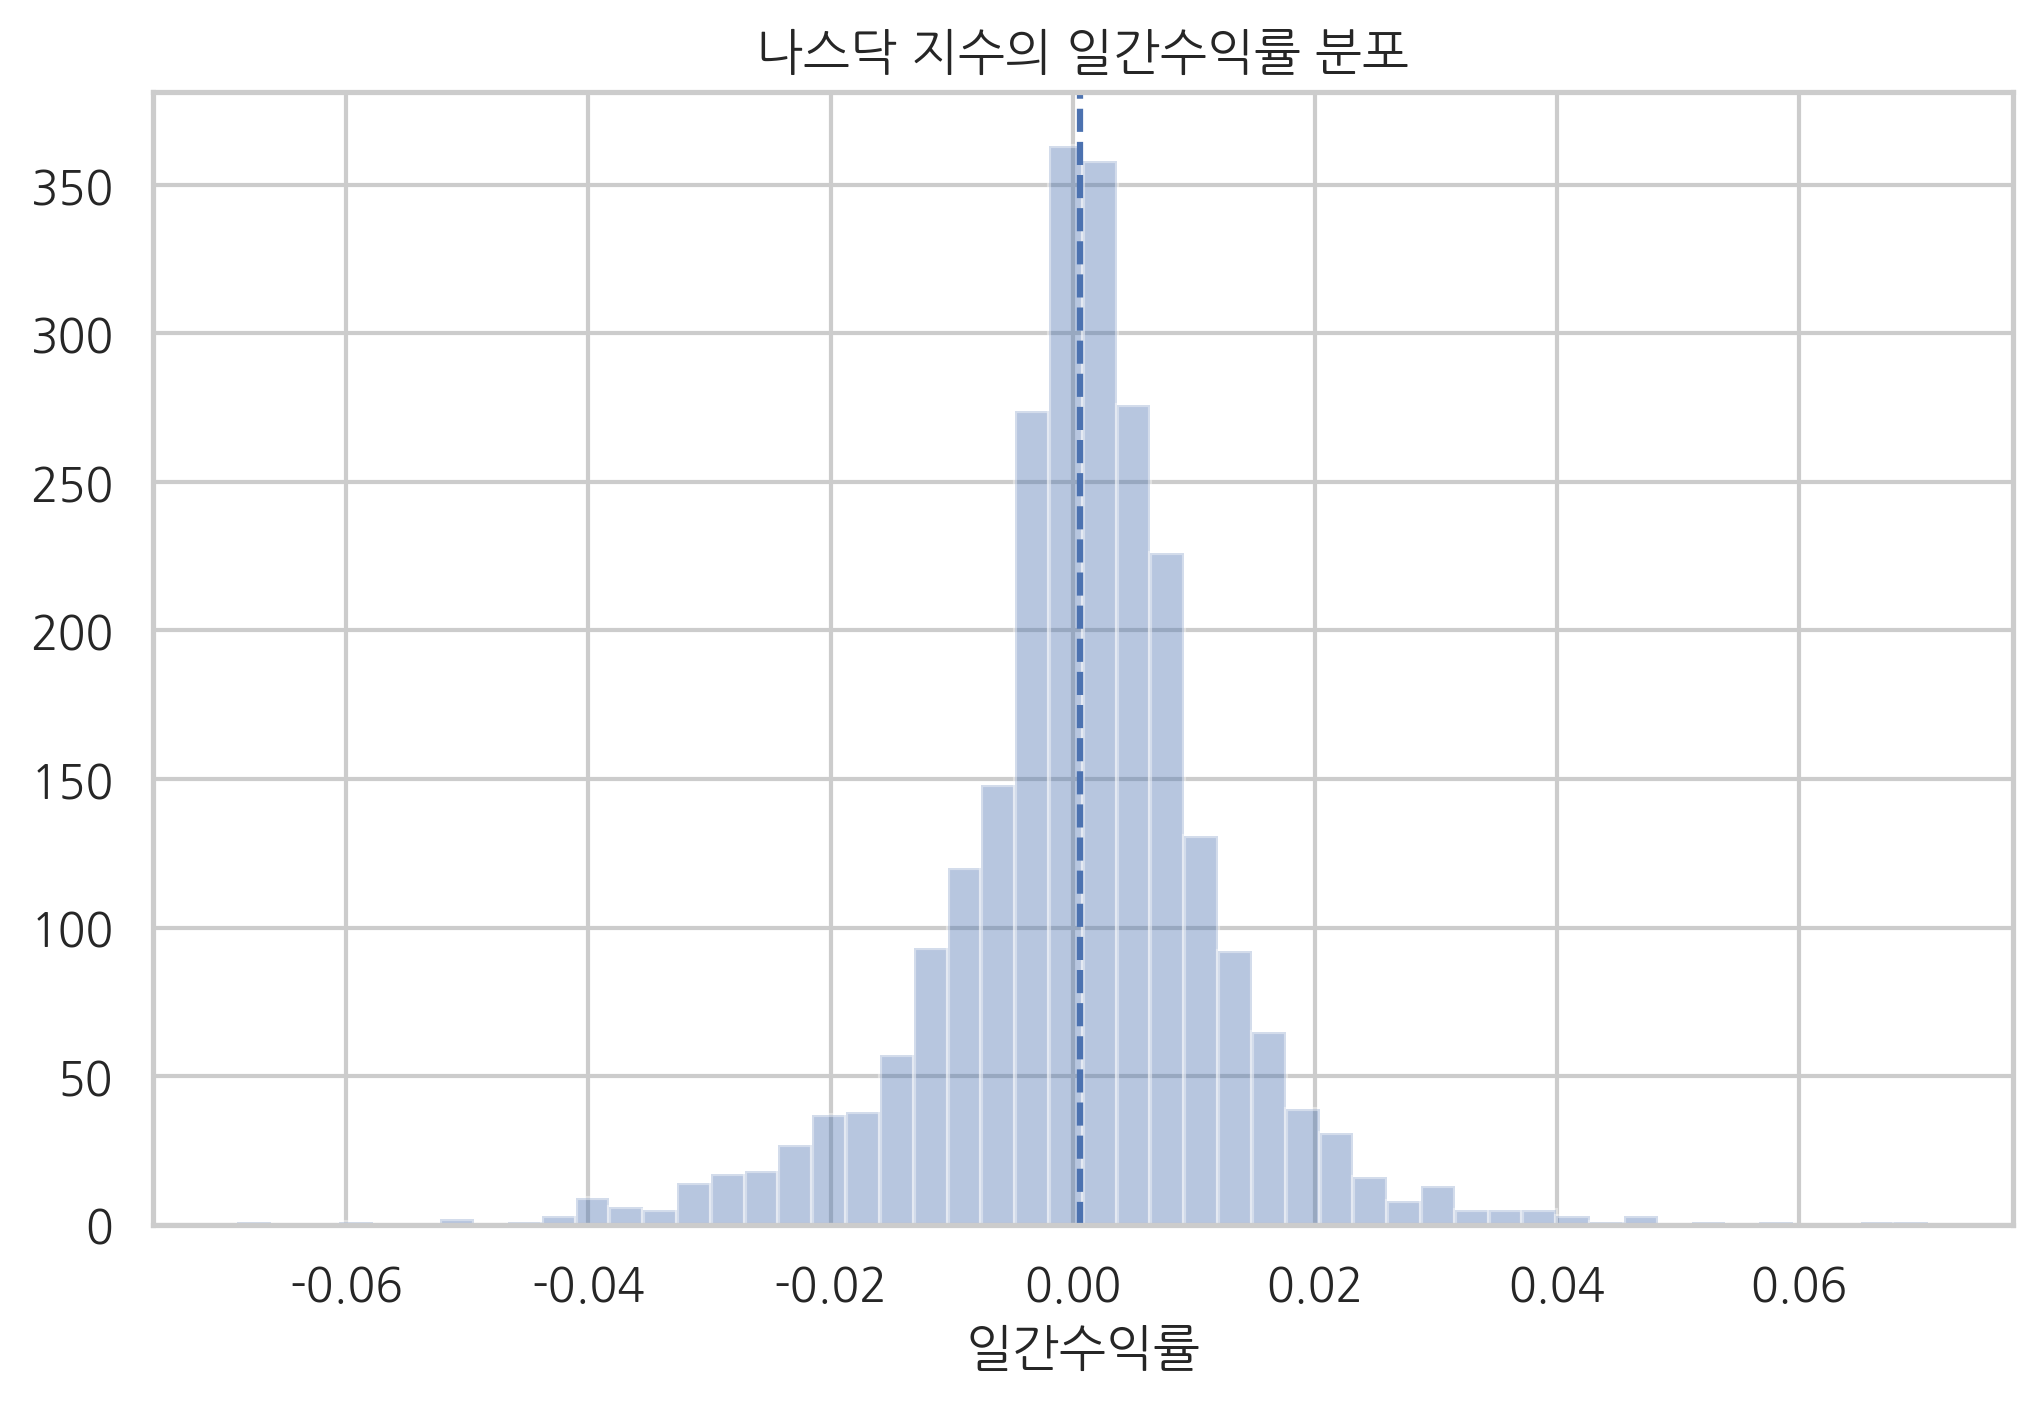

In [18]:
data = daily_returns.values
sns.distplot(daily_returns.values,  kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('나스닥 지수의 일간수익률 분포')
plt.xlabel('일간수익률')
plt.show()

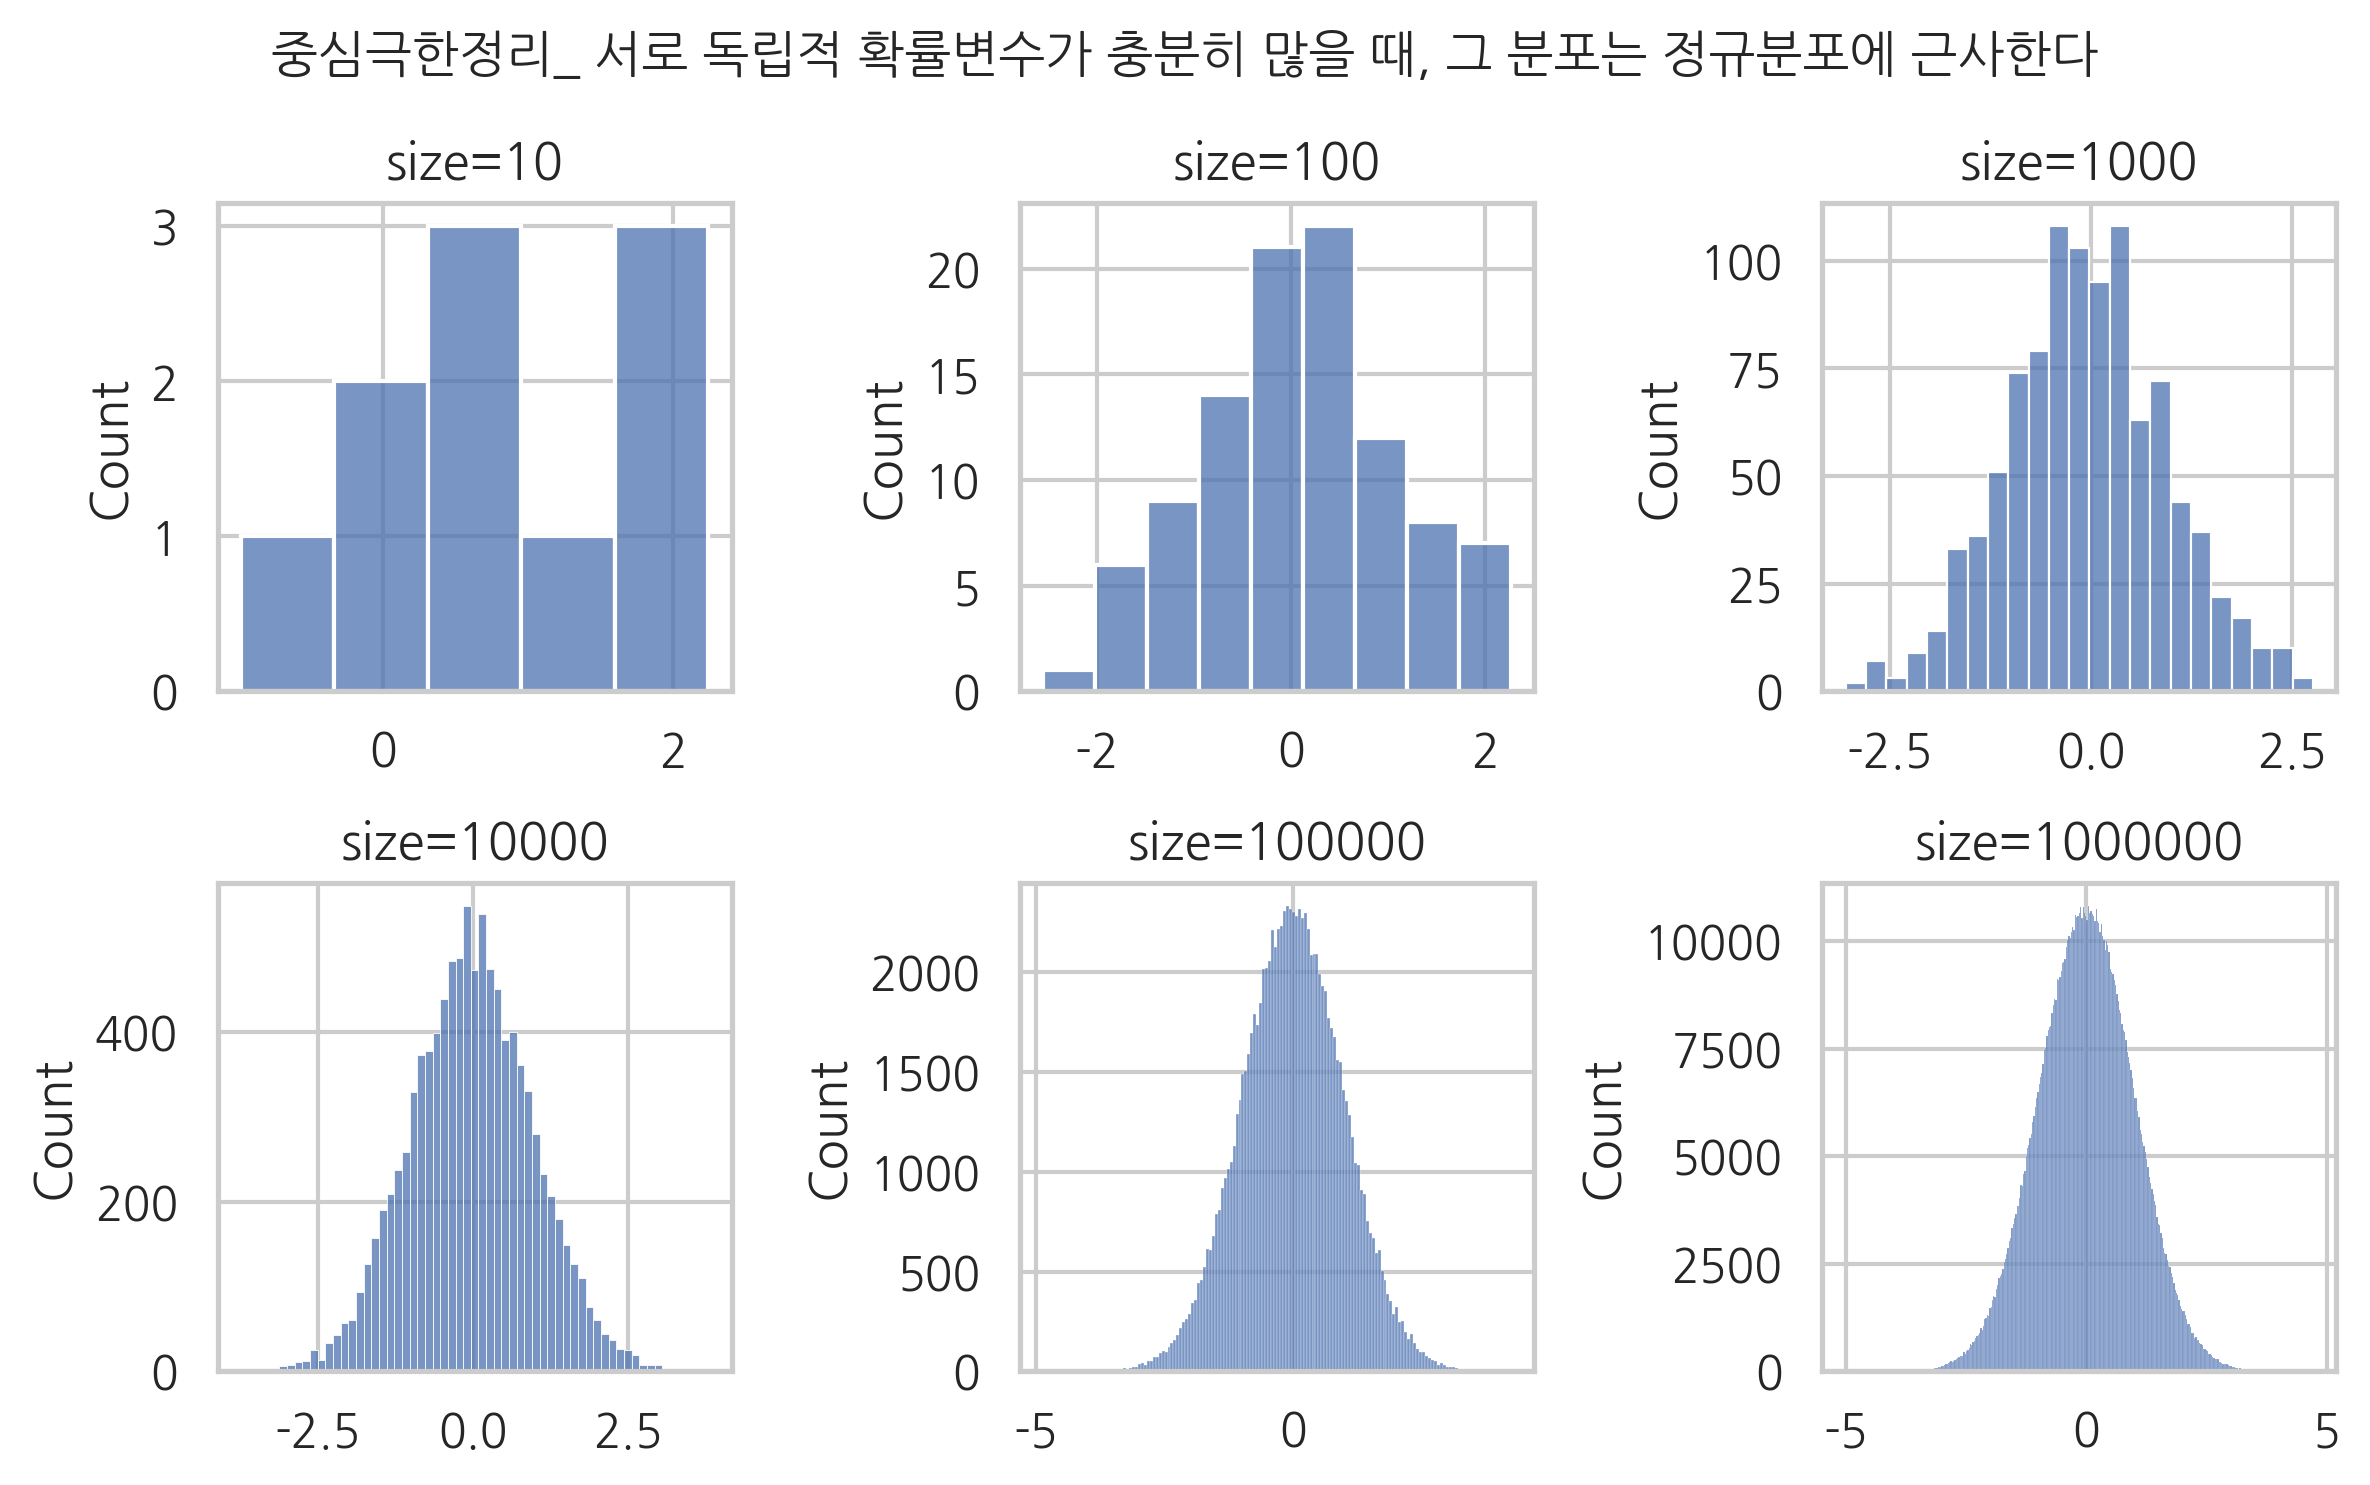

In [156]:
#8.4.1 연습문제 
def make_gausian(size) : 
    np.random.seed(0)
    X = np.random.normal(size=size)
    sns.histplot(X)
    plt.title(f'size={size}')
plt.subplot(231)
make_gausian(10)
plt.subplot(232)
make_gausian(100)
plt.subplot(233)
make_gausian(1000)
plt.subplot(234)
make_gausian(10000)
plt.subplot(235)
make_gausian(100000)
plt.subplot(236)
make_gausian(1000000)
plt.suptitle('중심극한정리_ 서로 독립적 확률변수가 충분히 많을 때, 그 분포는 정규분포에 근사한다')
plt.tight_layout()
plt.show()

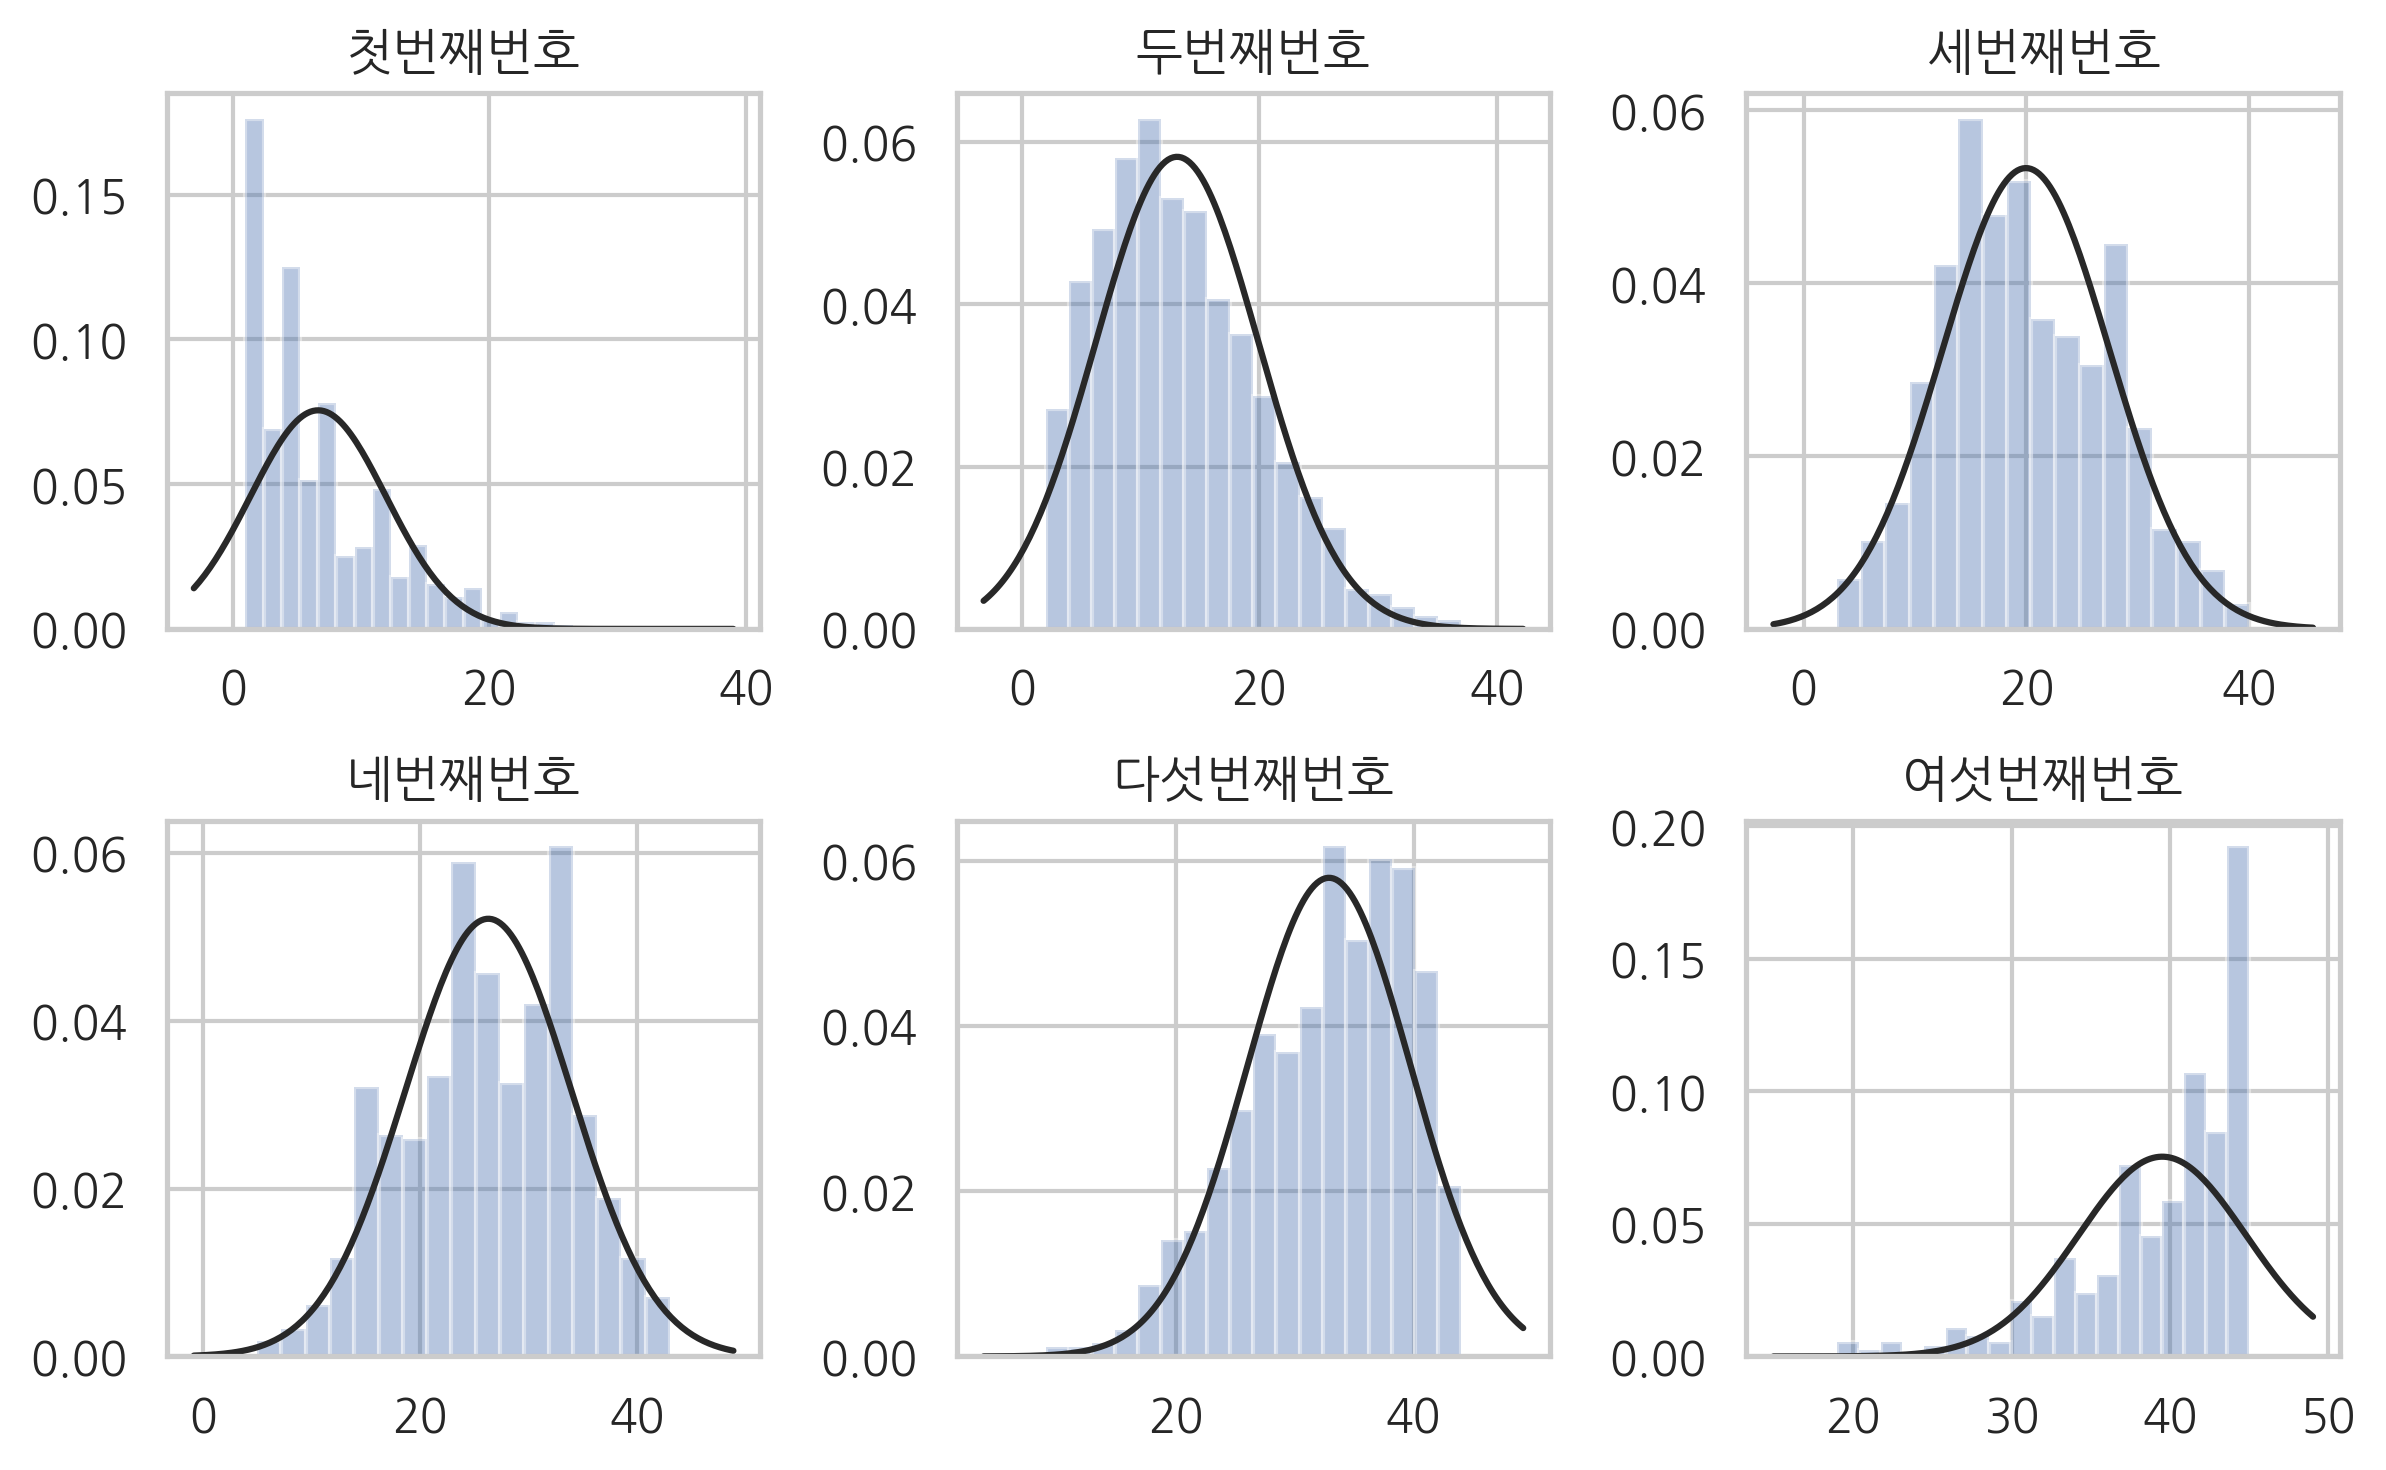

In [248]:
#8.4.1 연습문제 다시 풀어보기 
df = pd.read_csv('/Users/kibeomkim/desktop/lotto.csv')
plt.subplot(231)
plt.title('첫번째번호')
data = df[['첫번째번호']].values
sns.distplot(data, fit=sp.stats.norm, kde=False, )

plt.subplot(232)
plt.title('두번째번호')
data = df[['두번째번호']].values
sns.distplot(data, fit=sp.stats.norm, kde=False, )

plt.subplot(233)
plt.title('세번째번호')
data = df[['세번째번호']].values
sns.distplot(data, fit=sp.stats.norm, kde=False, )

plt.subplot(234)
plt.title('네번째번호')
data = df[['네번째번호']].values
sns.distplot(data, fit=sp.stats.norm, kde=False, )

plt.subplot(235)
plt.title('다섯번째번호')
data = df[['다섯번째번호']].values
sns.distplot(data, fit=sp.stats.norm, kde=False, )

plt.subplot(236)
plt.title('여섯번째번호')
data = df[['여섯번째번호']].values
sns.distplot(data,fit=sp.stats.norm,kde=False, )

plt.tight_layout()

In [207]:
df

첫번째번호  두번째번호  세번째번호  네번째번호  다섯번째번호  여섯번째번호  보너스 번호
0       10     23     29     33      37      40      16
1        9     13     21     25      32      42       2
2       11     16     19     21      27      31      30
3       14     27     30     31      40      42       2
4       16     24     29     40      41      42       3
..     ...    ...    ...    ...     ...     ...     ...
944      9     10     15     30      33      37      26
945      9     18     19     30      34      40      20
946      3      8     17     20      27      35      26
947     13     18     30     31      38      41       5
948     14     21     35     36      40      44      30

[949 rows x 7 columns]

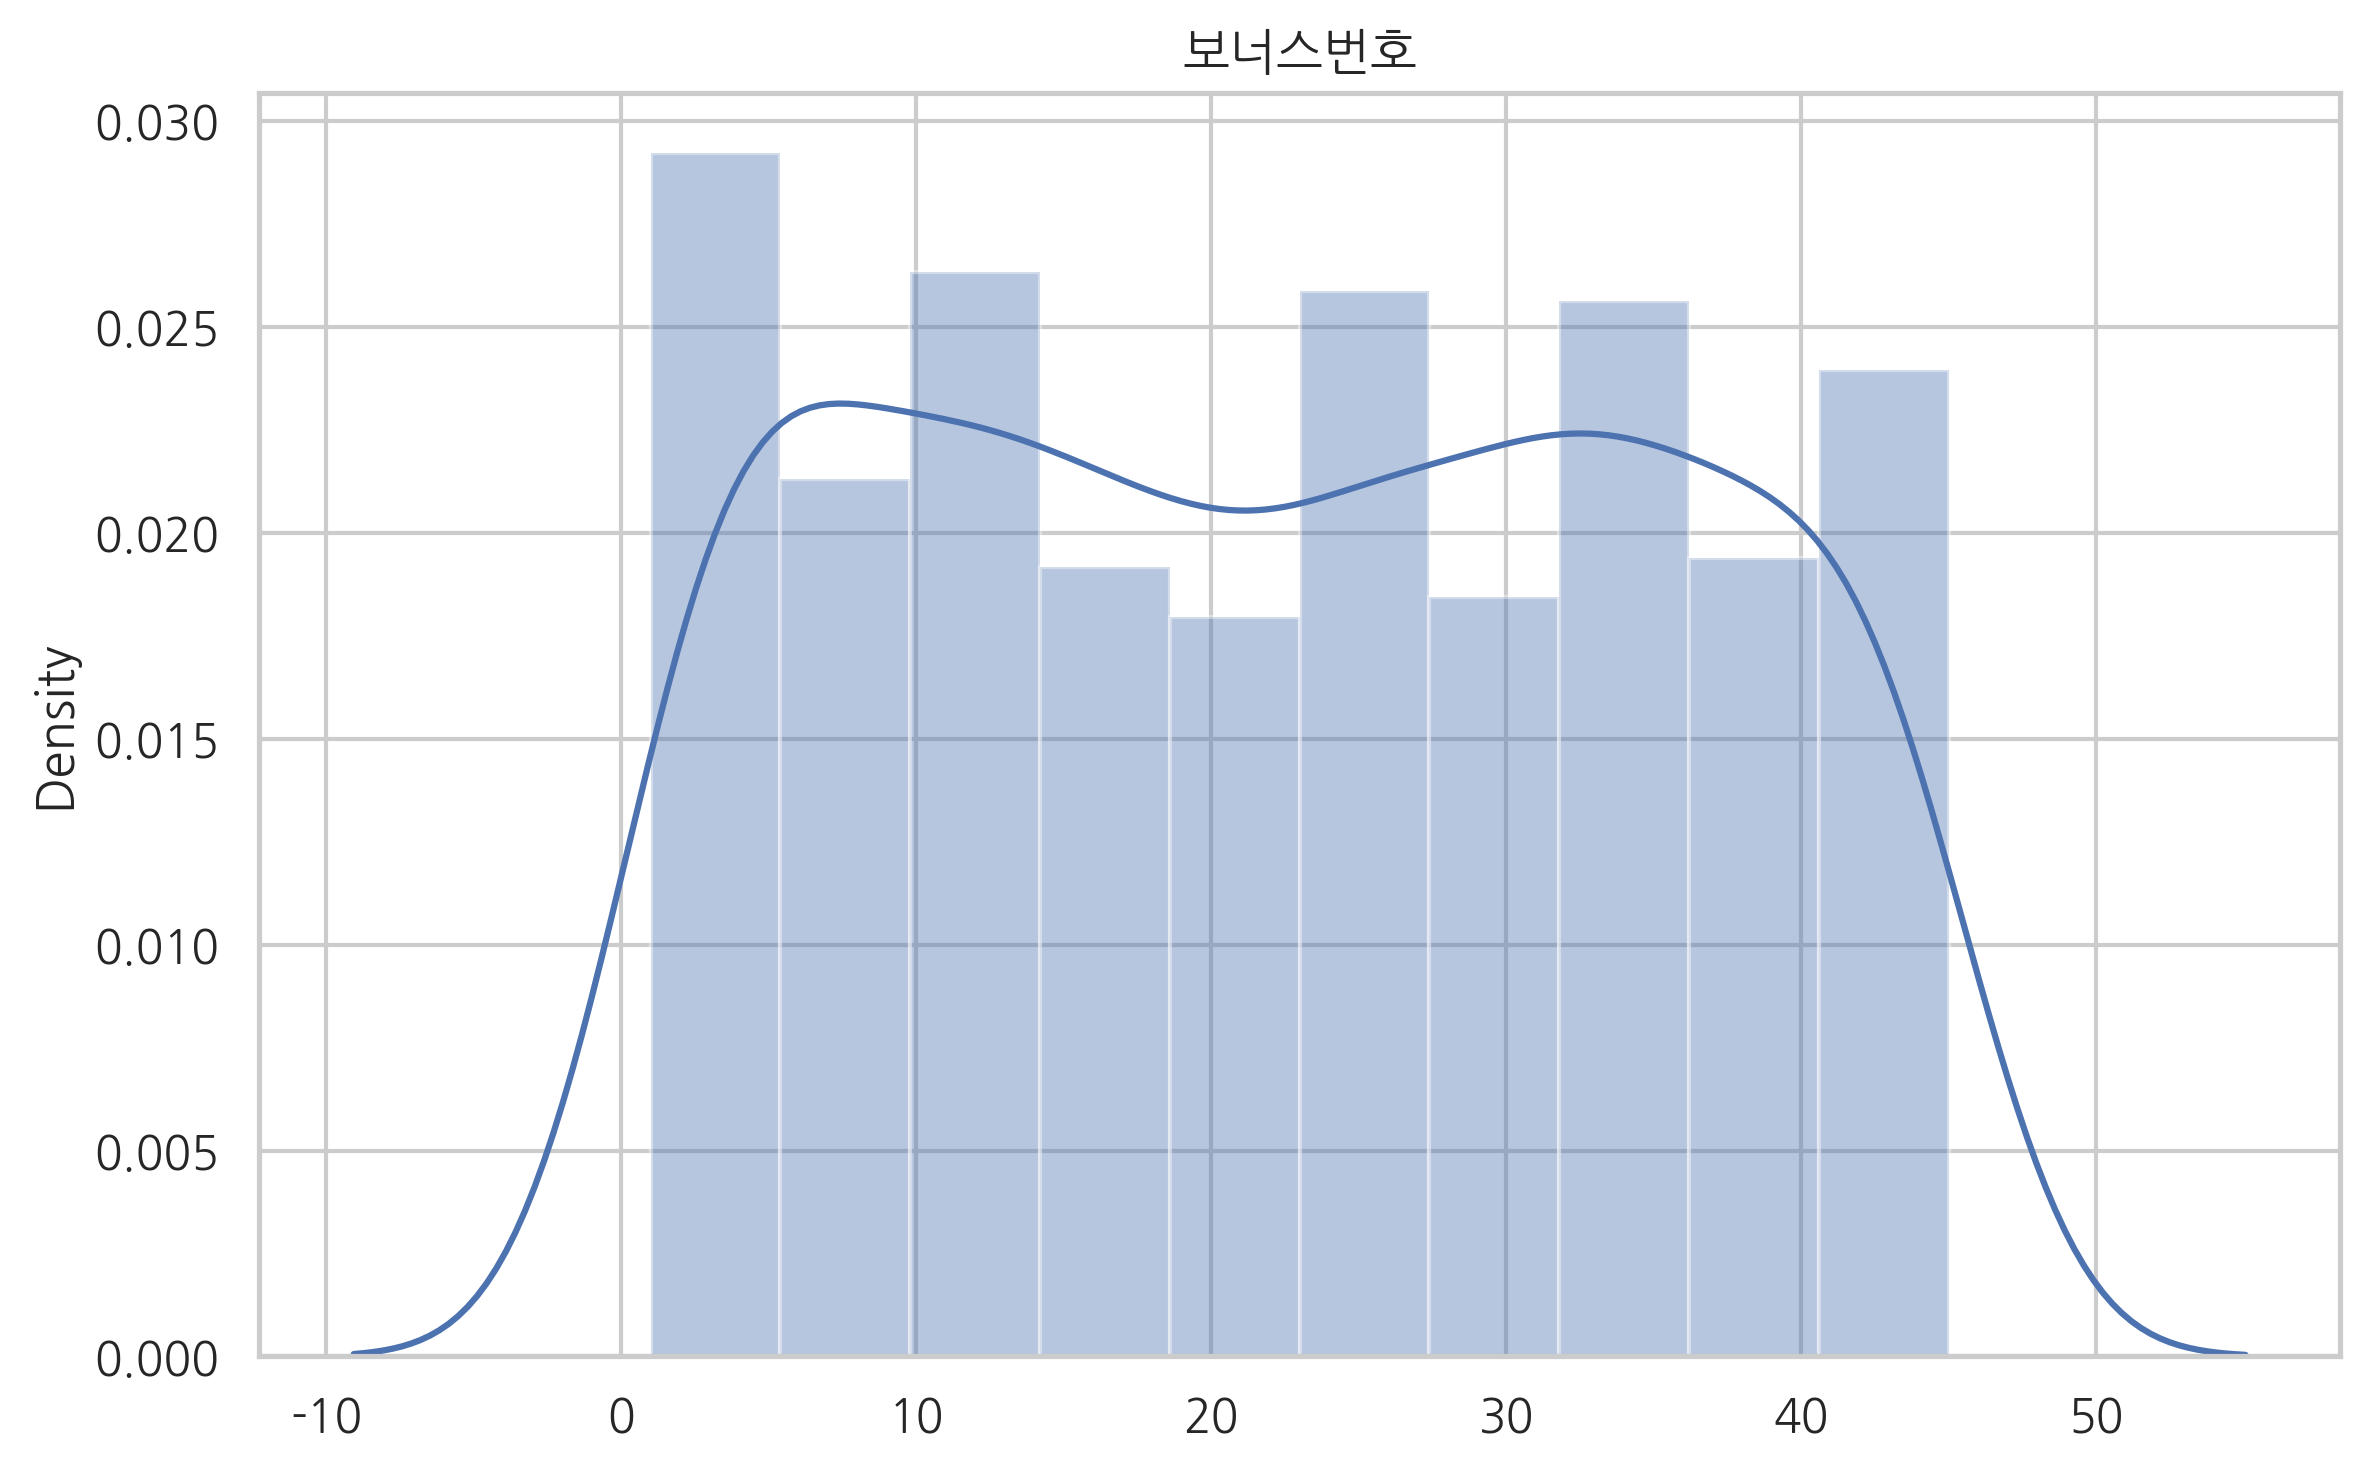

In [253]:
plt.title('보너스번호')
data = df[['보너스 번호']].values
sns.distplot(data,kde=True)

plt.tight_layout()

# 좀 더 생각해보기 

# 로그정규분포

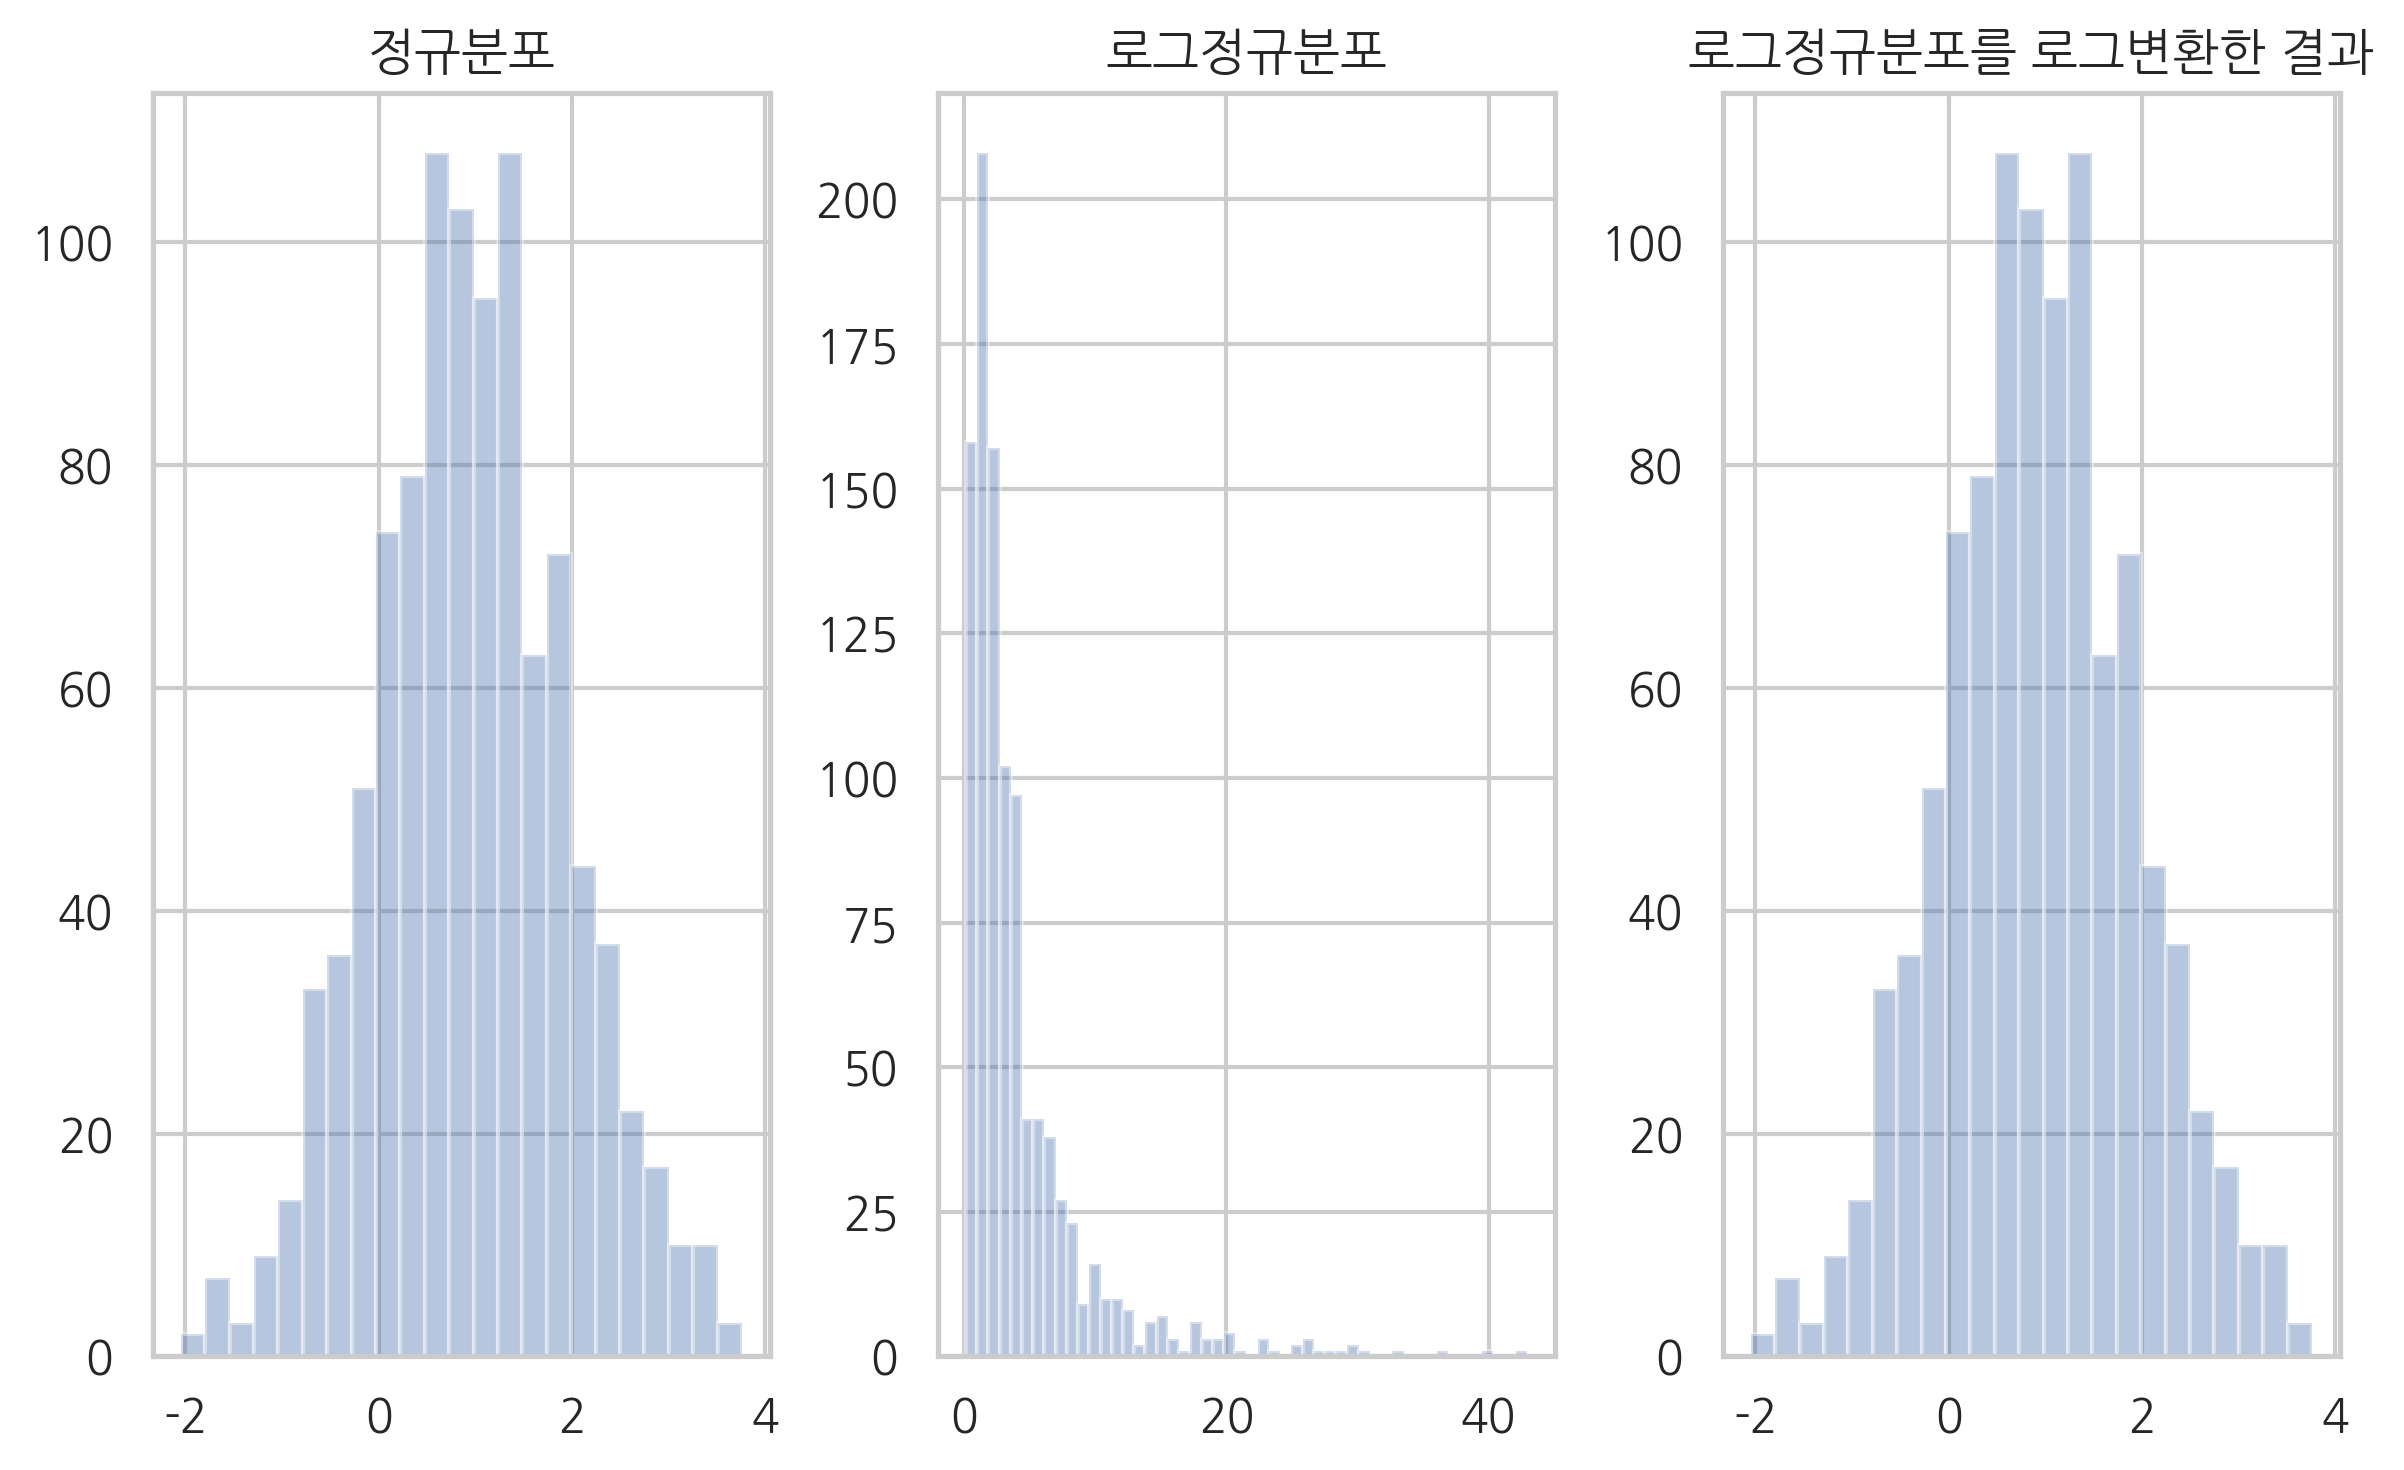

In [278]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
x2 = np.exp(x1)
x3 = np.log(x2)

fig, ax = plt.subplots(1,3)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title('정규분포')
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title('로그정규분포')
sns.distplot(x3, kde=False, ax=ax[2])
ax[2].set_title('로그정규분포를 로그변환한 결과')

plt.tight_layout()
plt.show()

# Q-Q플롯 
## 표본데이터가 정규분포 따르는지 여부를 검사하는 도구 

In [299]:
# 1. 표본데이터 정렬한다.
rv = sp.stats.norm(loc=0,scale=1)
x = rv.rvs(20, random_state=0)
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [305]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

# 2. 표본 데이터 하나하나의 순서통계량 값 구한다.
position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [307]:
#3. 각 순서통계량 값에 대한 누적확률함수의 역함숫값 구한다. 
qf = rv.ppf(position)
qf

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

# Q-Q 플롯 그리는 방법 요약 
1. 각각 표본값 정렬한다. 
2. 각 표본의 위칫값(순서통계량 값)구한다. 
3. 각 위칫값에 대한 누적확률함수 역함숫값 구한다. --> 분위숫값 나온다. 
4. (분위숫값, 표본값) 쌍 각각 만들어서 스캐터 플롯으로 2차원 공간에 표현한다. 

[0.03406367 0.08261724 0.13172109 0.18082494 0.2299288  0.27903265
 0.32813651 0.37724036 0.42634422 0.47544807 0.52455193 0.57365578
 0.62275964 0.67186349 0.72096735 0.7700712  0.81917506 0.86827891
 0.91738276 0.96593633]


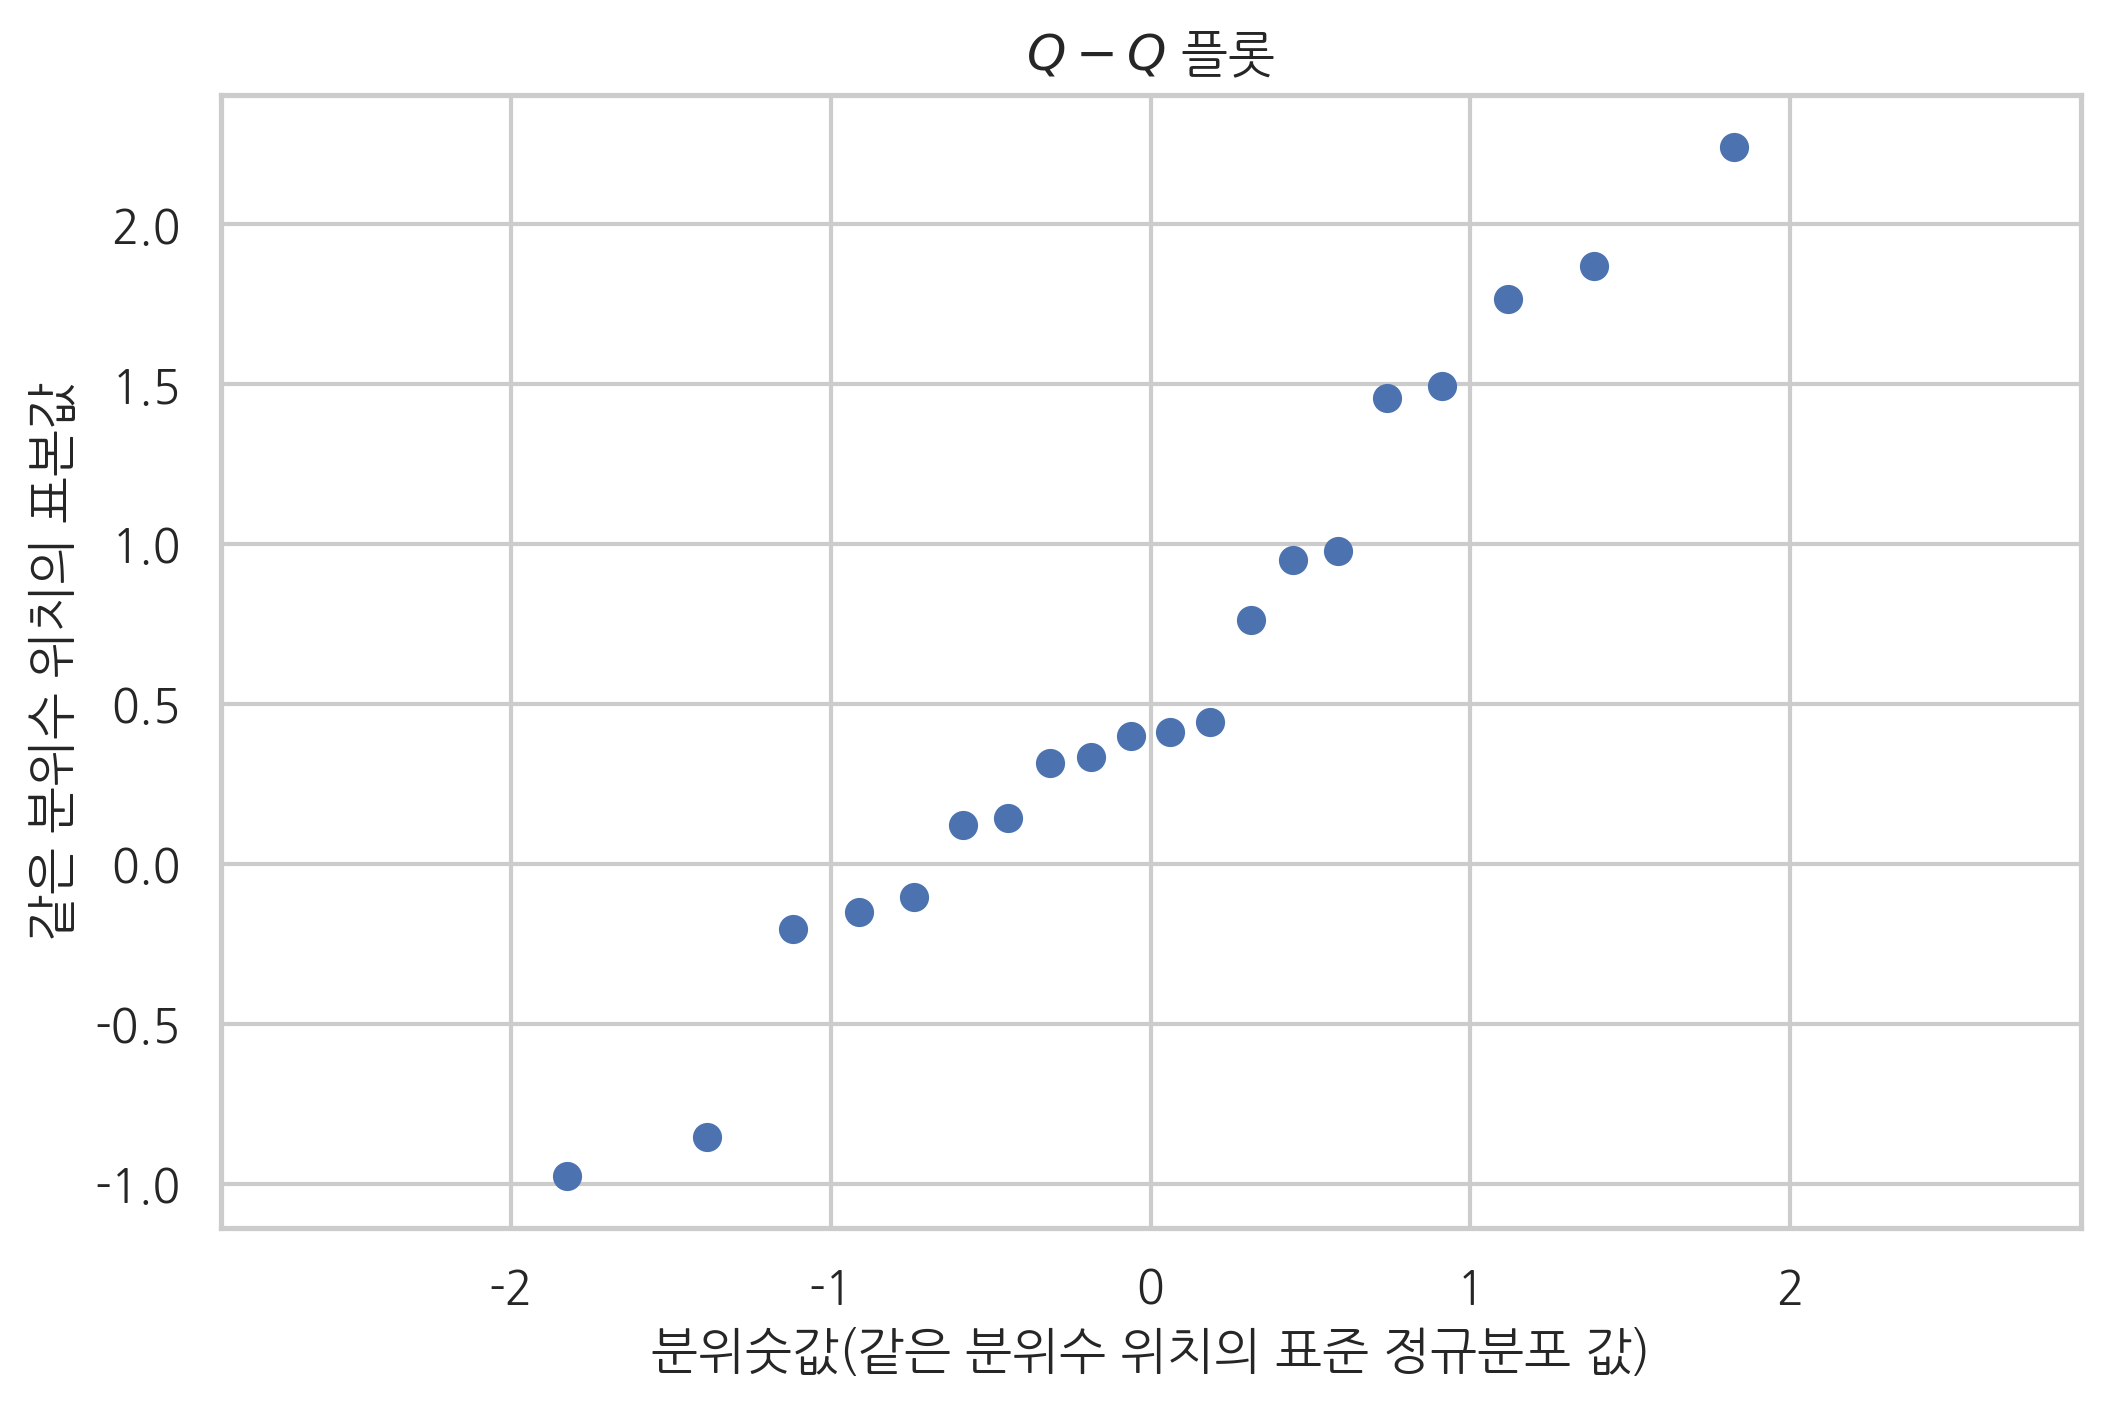

In [330]:
# 다시연습해보기 
mu = 0
std = 1
rv = sp.stats.norm(mu, std) # 기댓값이 1, 표준편차 0인 정규분포 생성

x = rv.rvs(20, random_state=0) # 시뮬레이션 20번. 표본 20개
x_sorted = np.sort(x) # 1. 정렬된 표본생성
# 2. 정렬된 각 표본의 위칫값
print(position)

#3. 각 위칫값에 대한 누적확률함수 역함숫값
qf = rv.ppf(position)

#4. 분위숫값-정렬된 표본 쌍 생성, 스캐터플롯 그리기 
plt.scatter(qf, x_sorted)
plt.title('$Q-Q$ 플롯')
plt.xlabel('분위숫값(같은 분위수 위치의 표준 정규분포 값)')
plt.ylabel('같은 분위수 위치의 표본값')
plt.axis('equal')
plt.show()

# probplot()

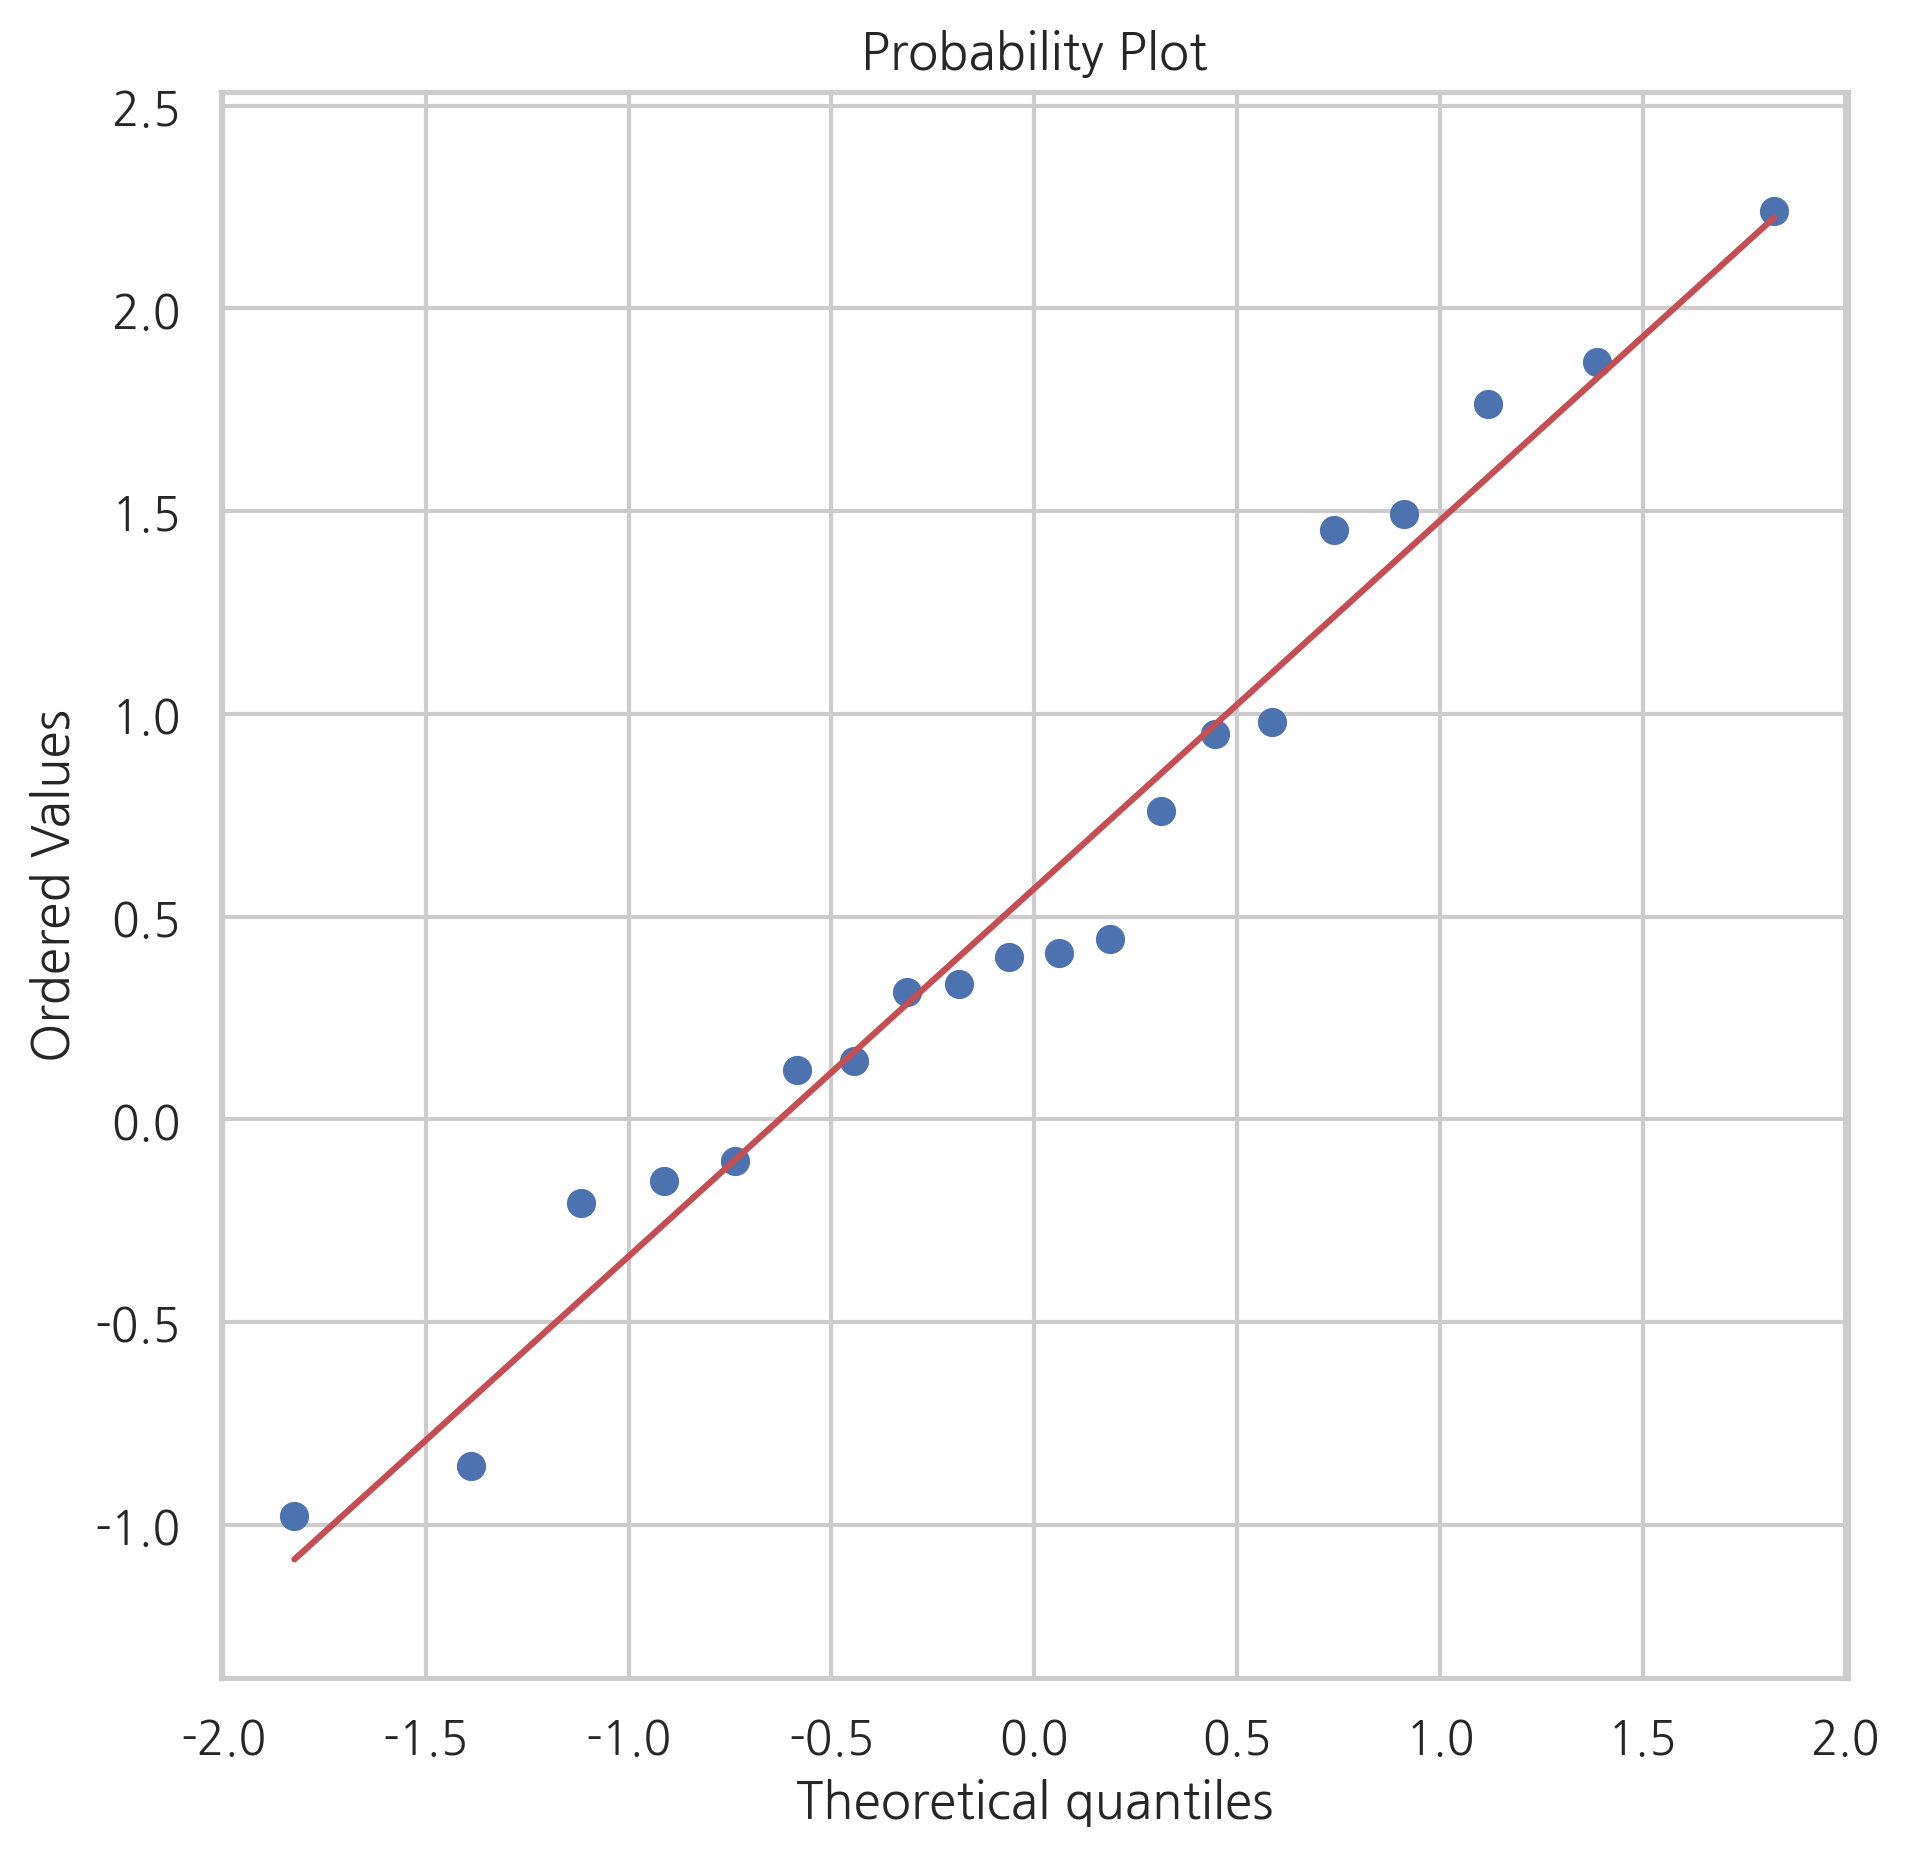

In [336]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)
plt.axis('equal')
plt.show()

# 표본데이터가 정규분포 따르면 : probplot()으로 그렸을 때 Q-Q플롯이 직선으로 나타난다. 

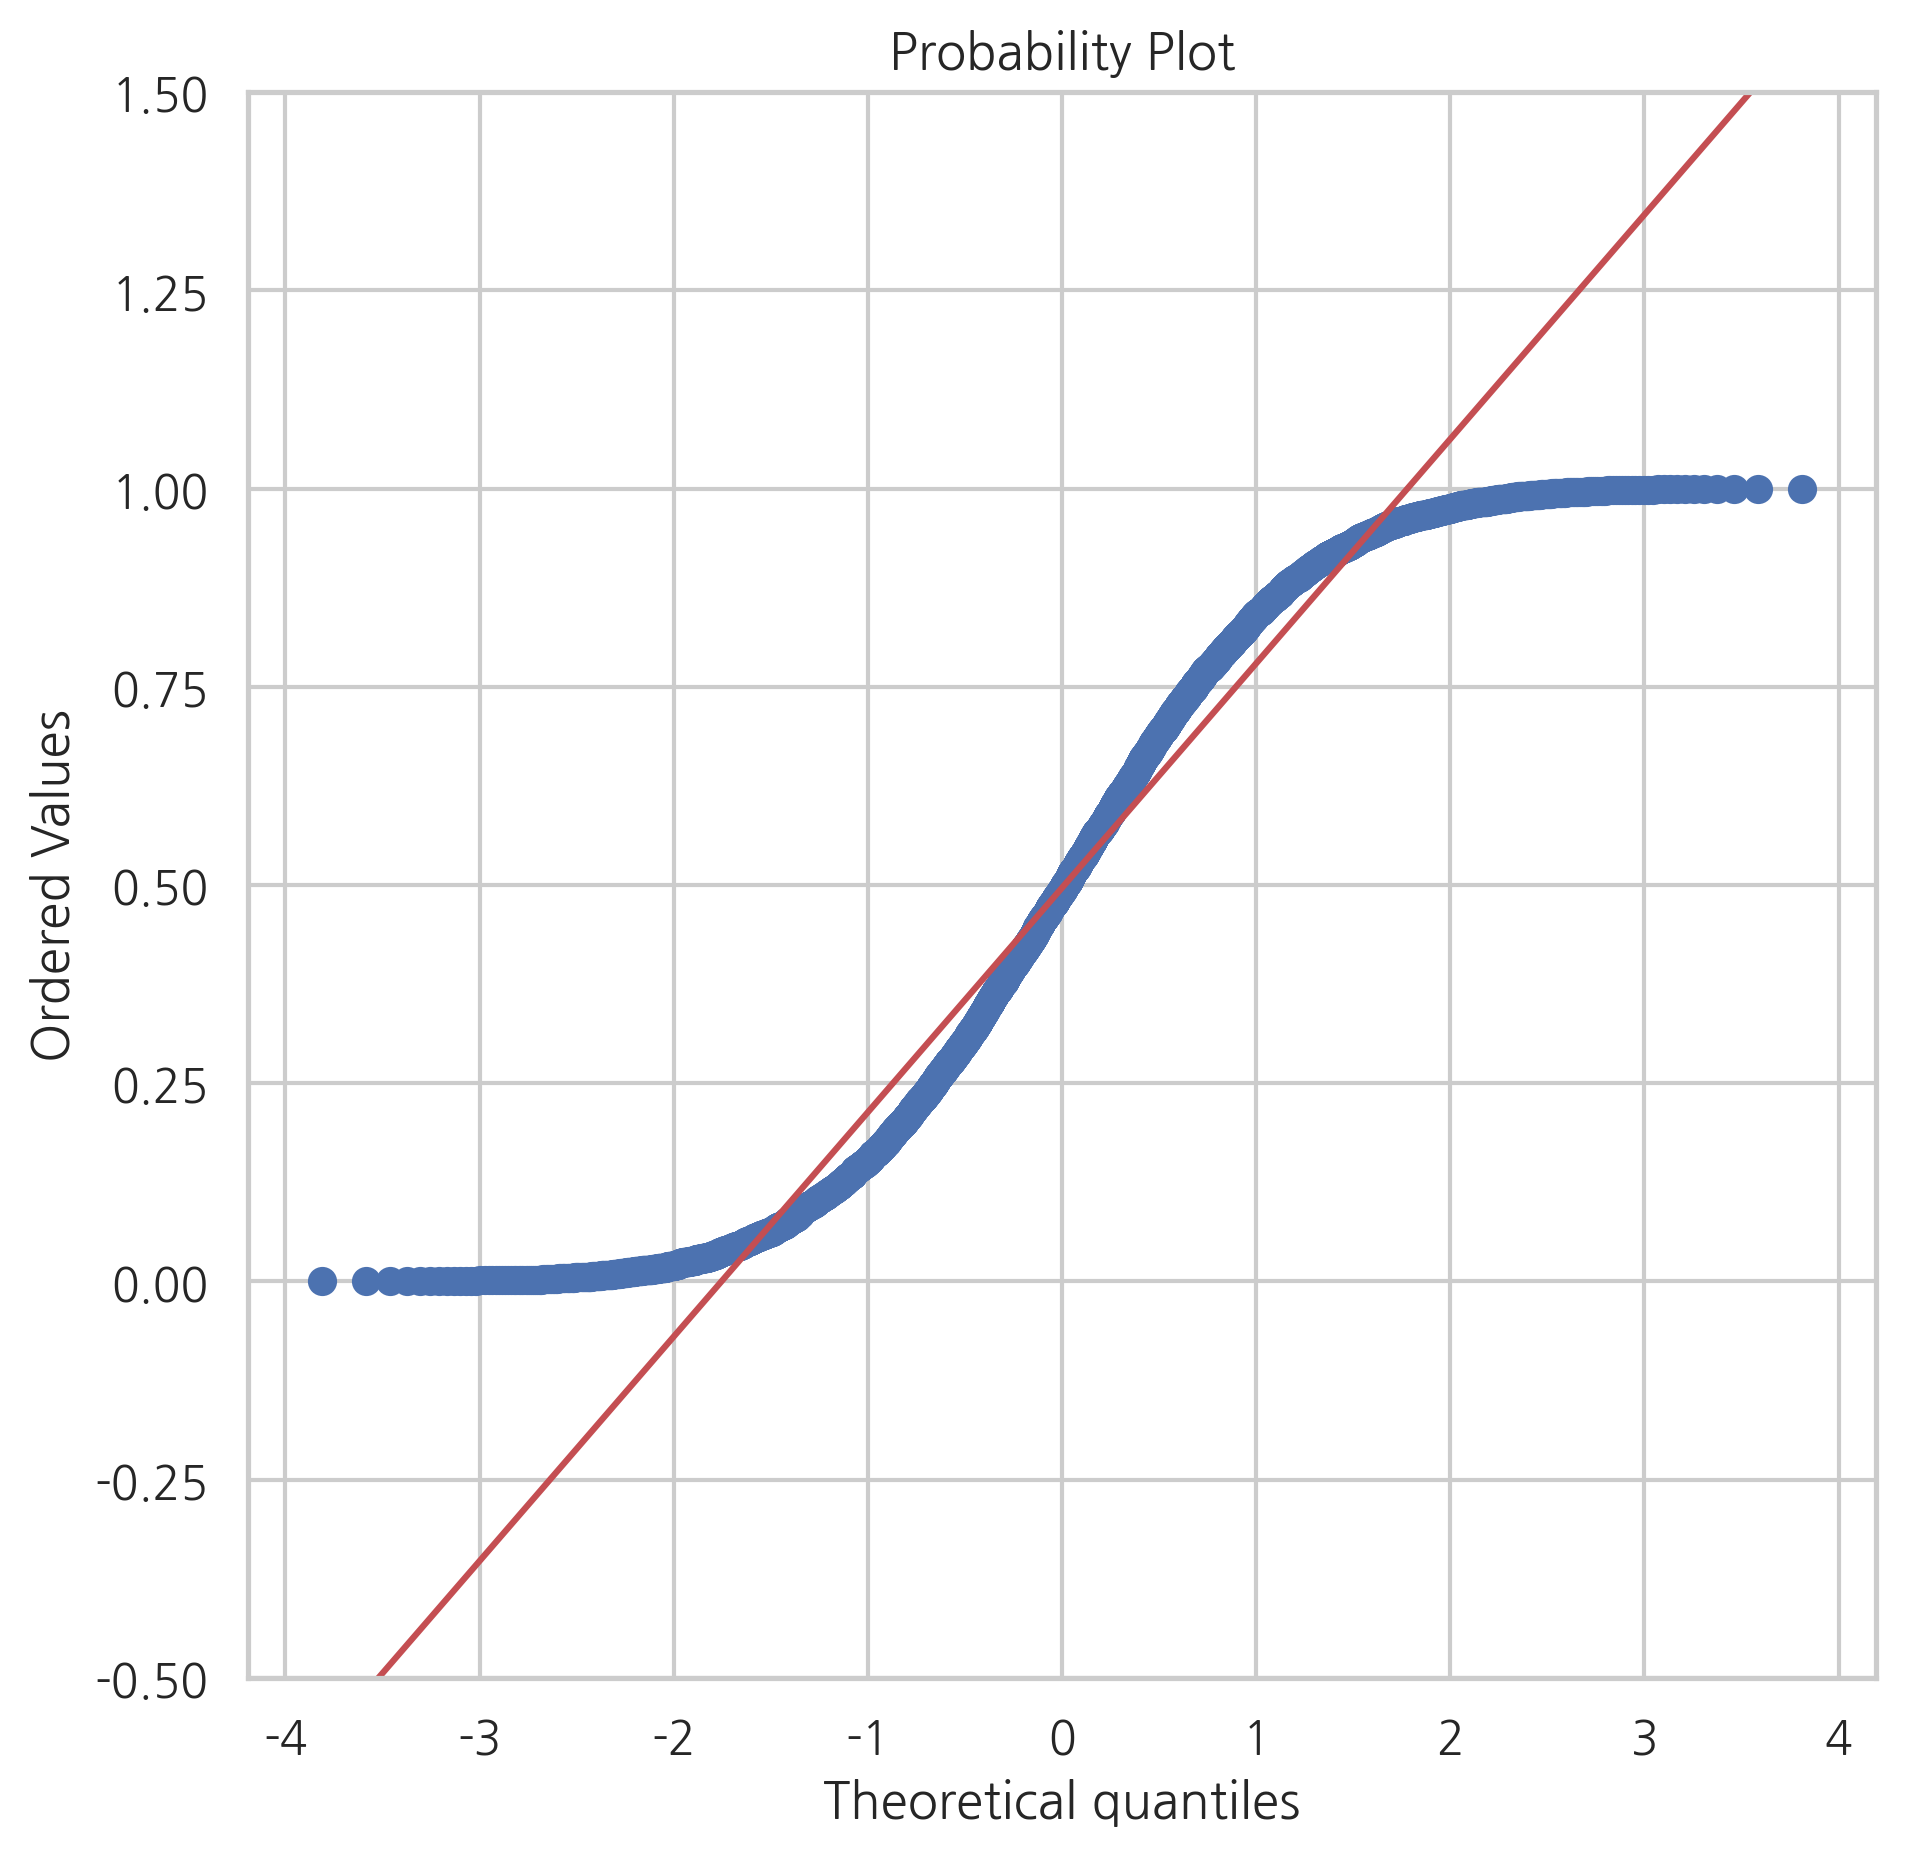

In [364]:
np.random.seed(0)
x = np.random.random_sample(10000) # 균등분포에서 표본 100개 생성 # 표본 분포는 균등분포 따를 것
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5,1.5)
plt.show()

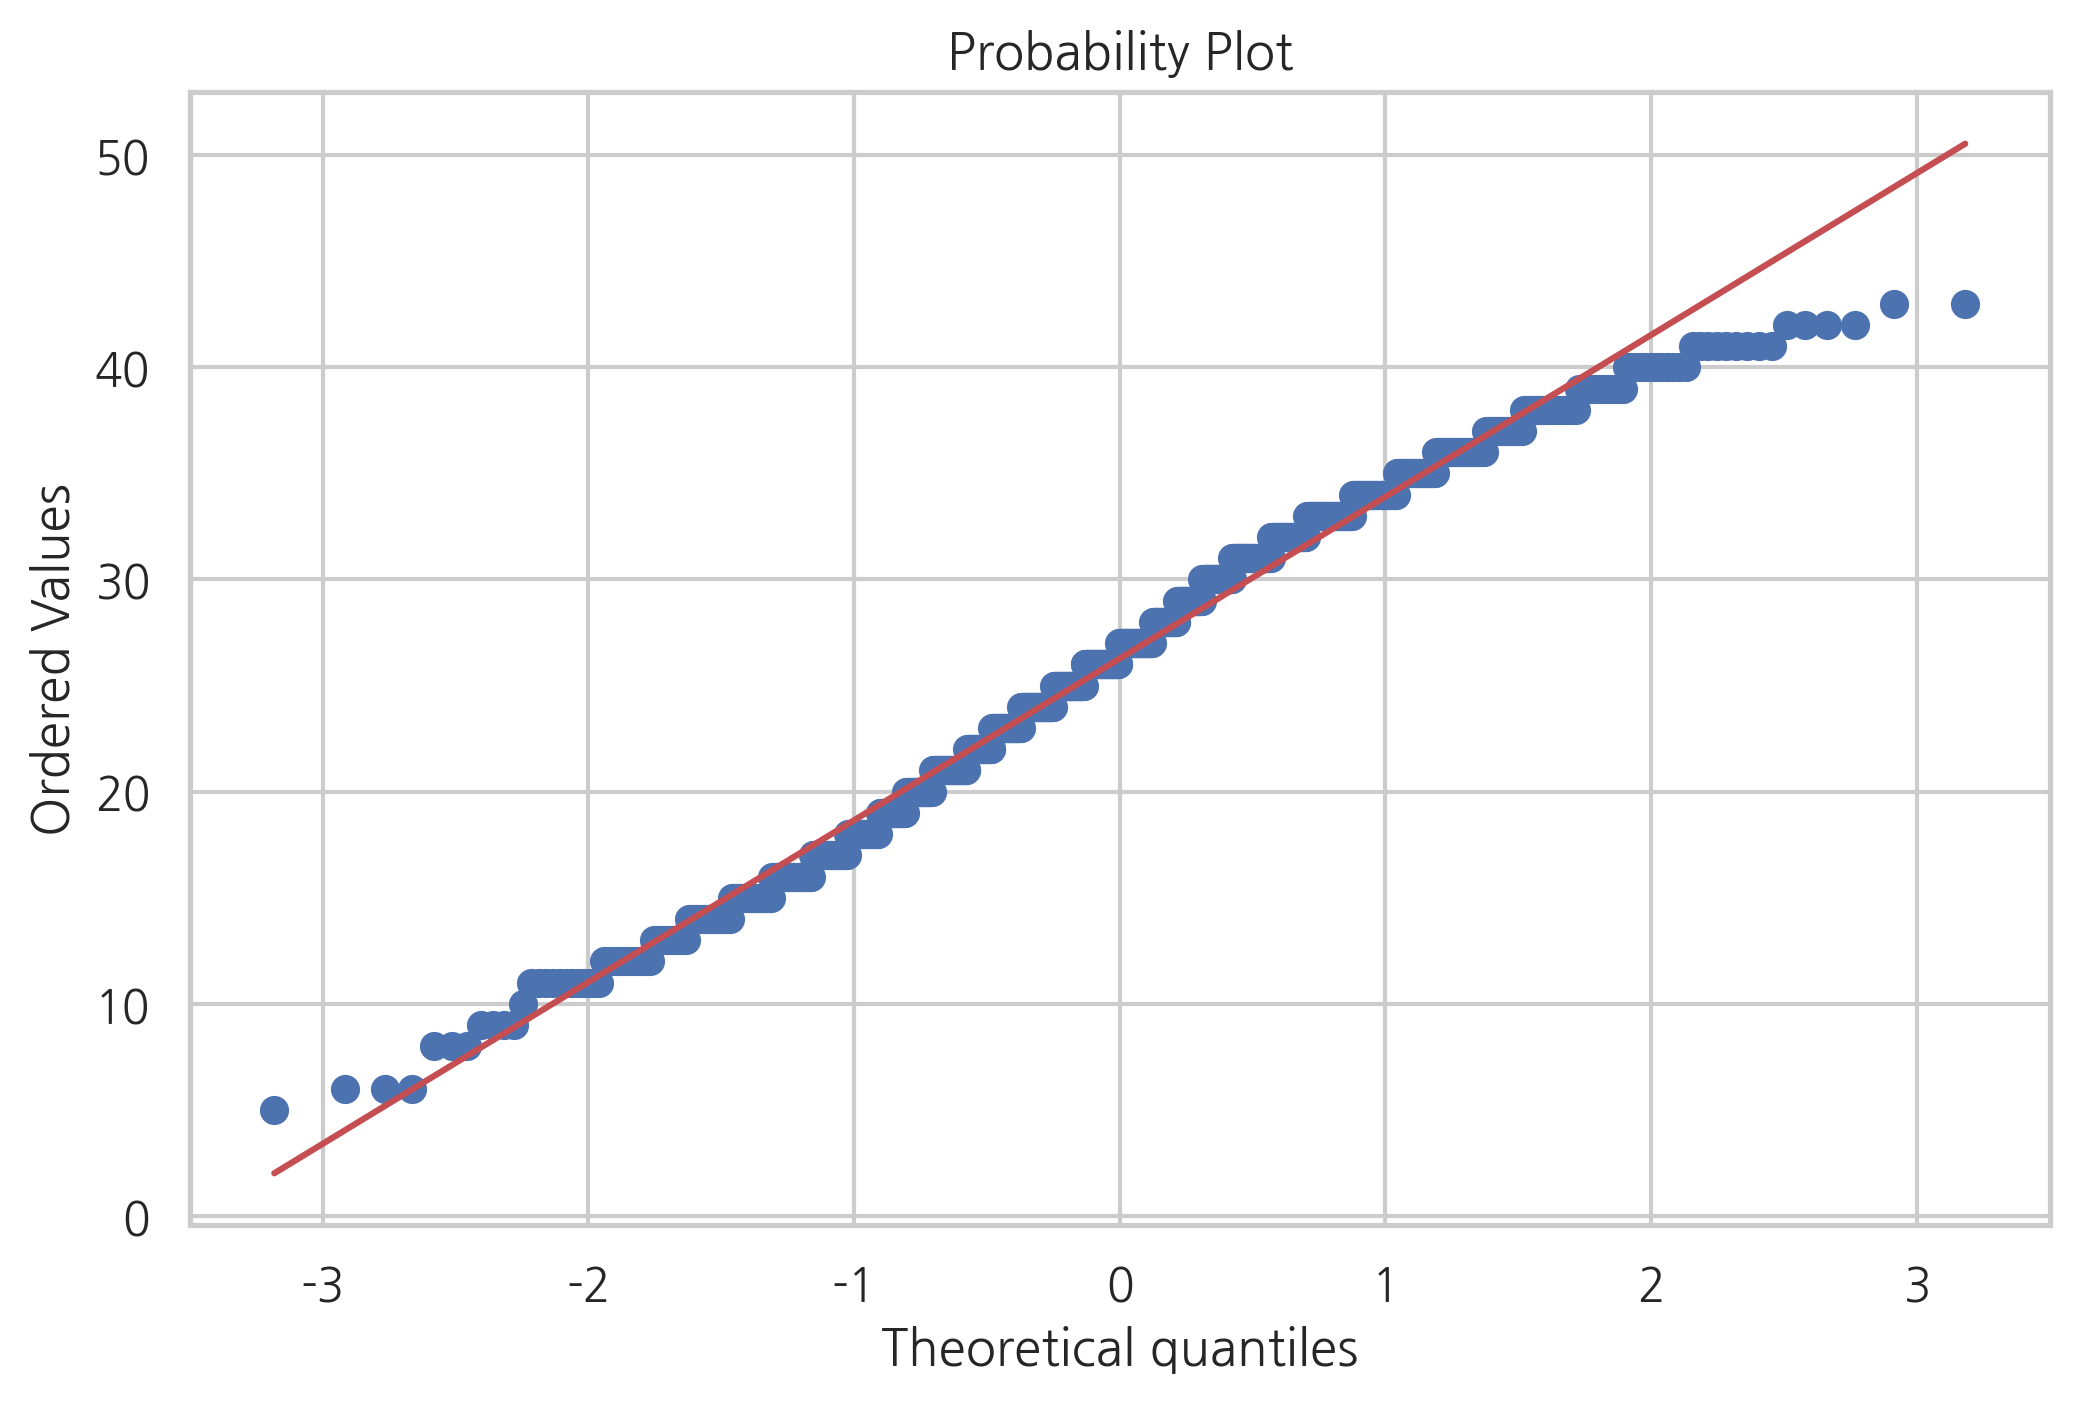

In [375]:
#8.4.2 연습문제 
data = df['네번째번호'].values
sp.stats.probplot(data, plot=plt)
plt.show()

# 정규분포를 따른다. 

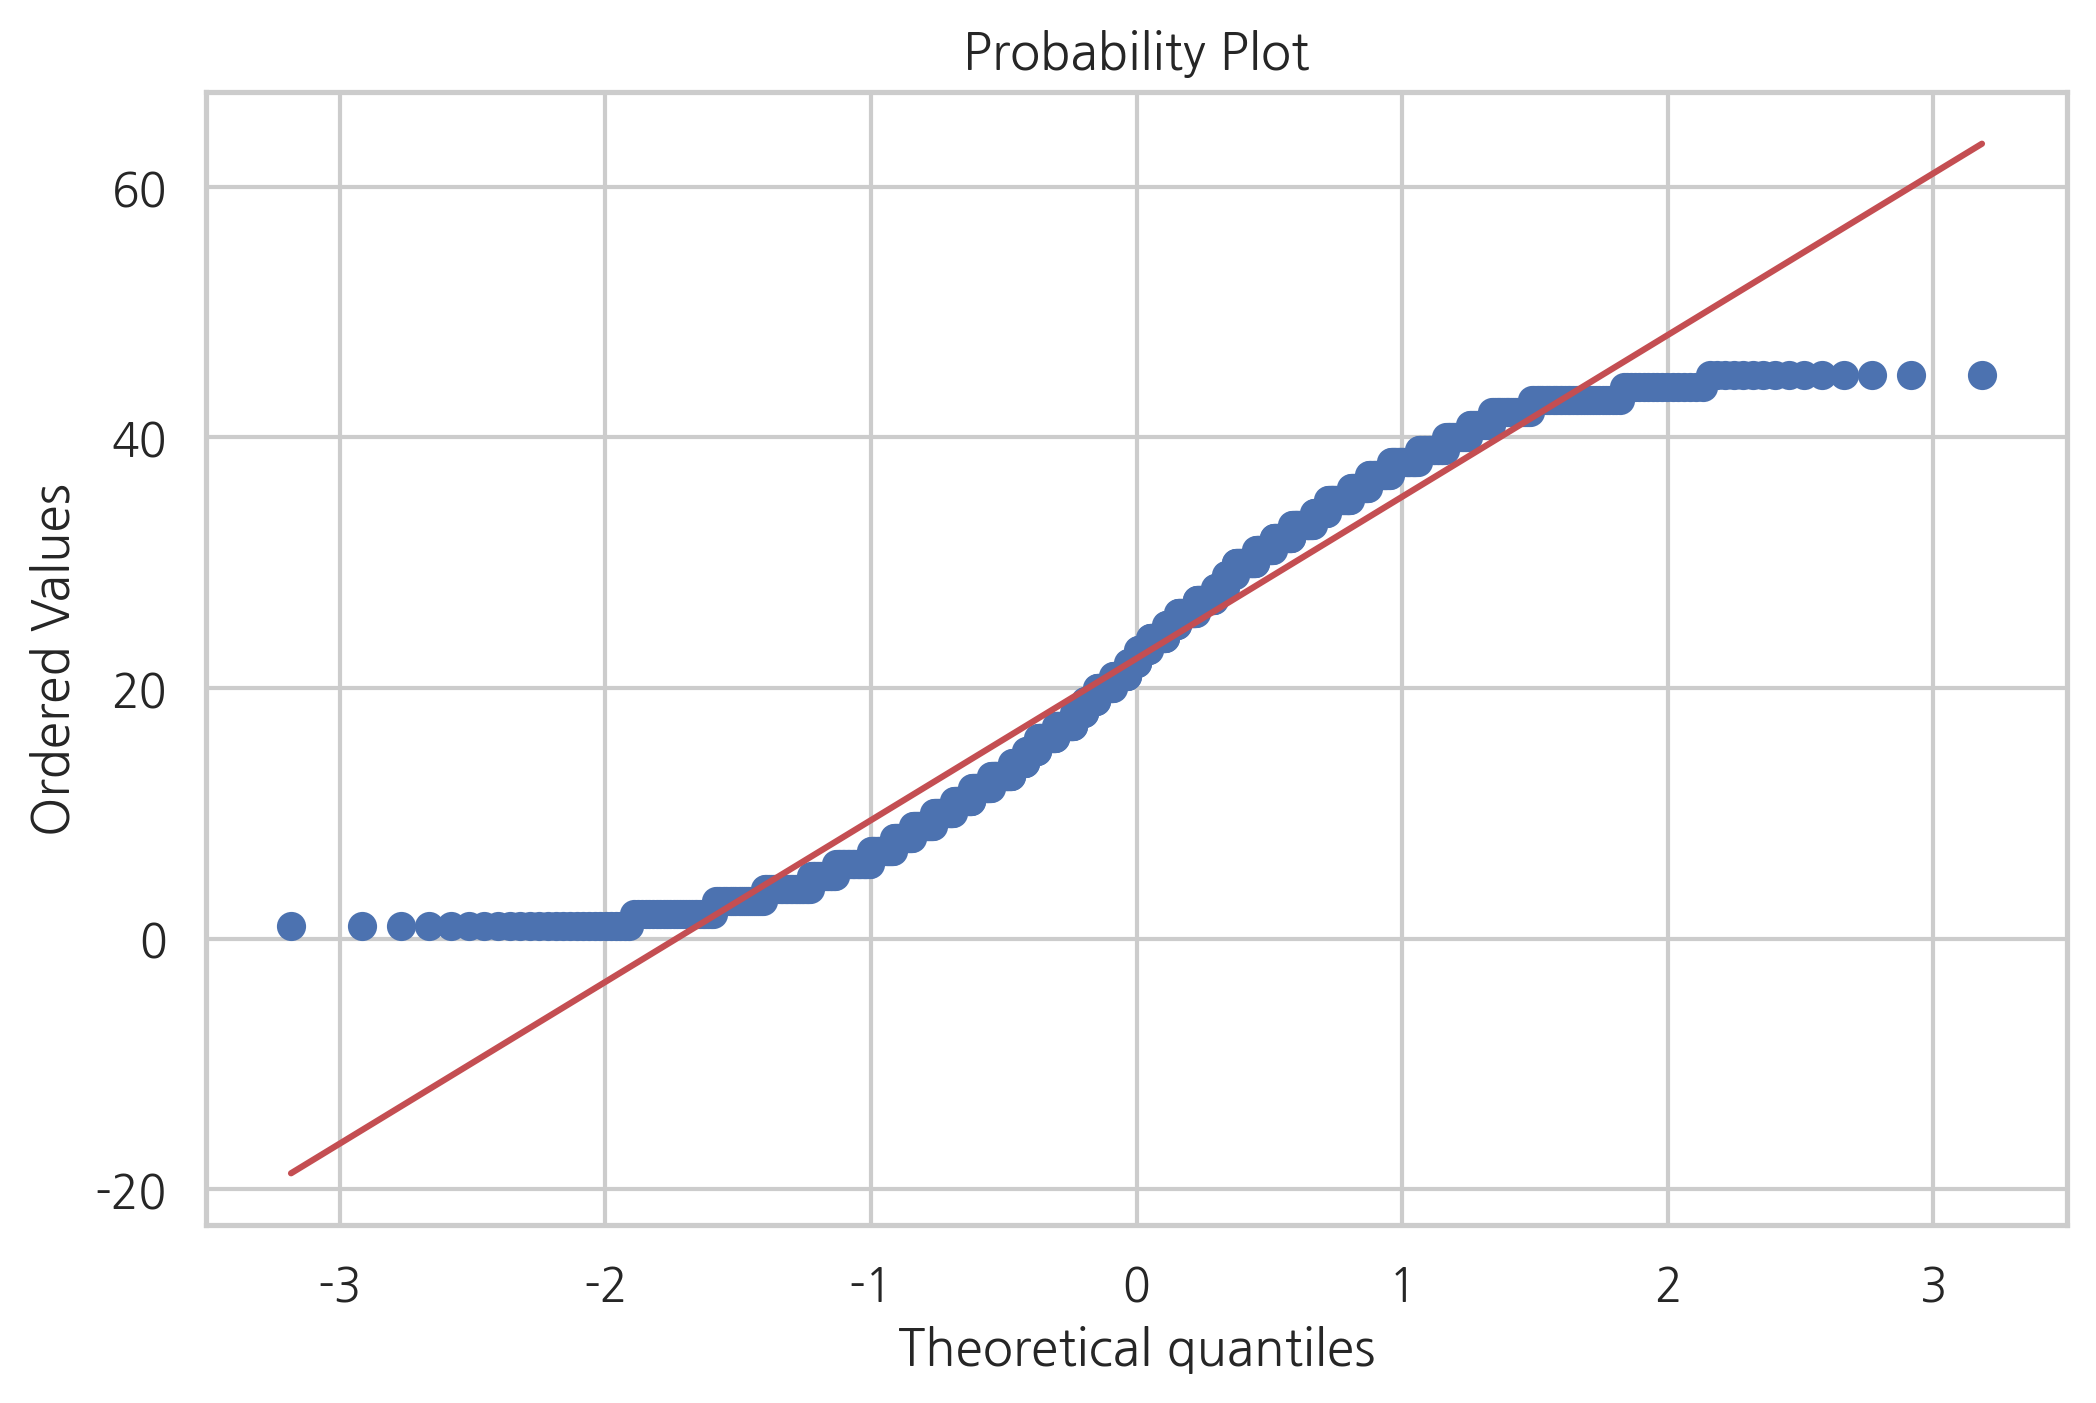

In [387]:
data2 = df['보너스 번호'].values
sp.stats.probplot(data2, plot=plt)
plt.show()

# 균일분포 이루는 보너스 번호는 표본데이터가 정규분포 따르지 않는다.

# enumerate() : 열거함수 
# 결과 : (0부터 시작하는)순서 - 리스트 내용 출력
### 예) enumerate([1,2,10]) 이면
### (0,1),(1,2),(2,10) 0번째 내용, 1번째 내용, 2번째 내용 이렇게 출력한다.

In [423]:
list(enumerate([1,2,3],start=0))

[(0, 1), (1, 2), (2, 3)]

##

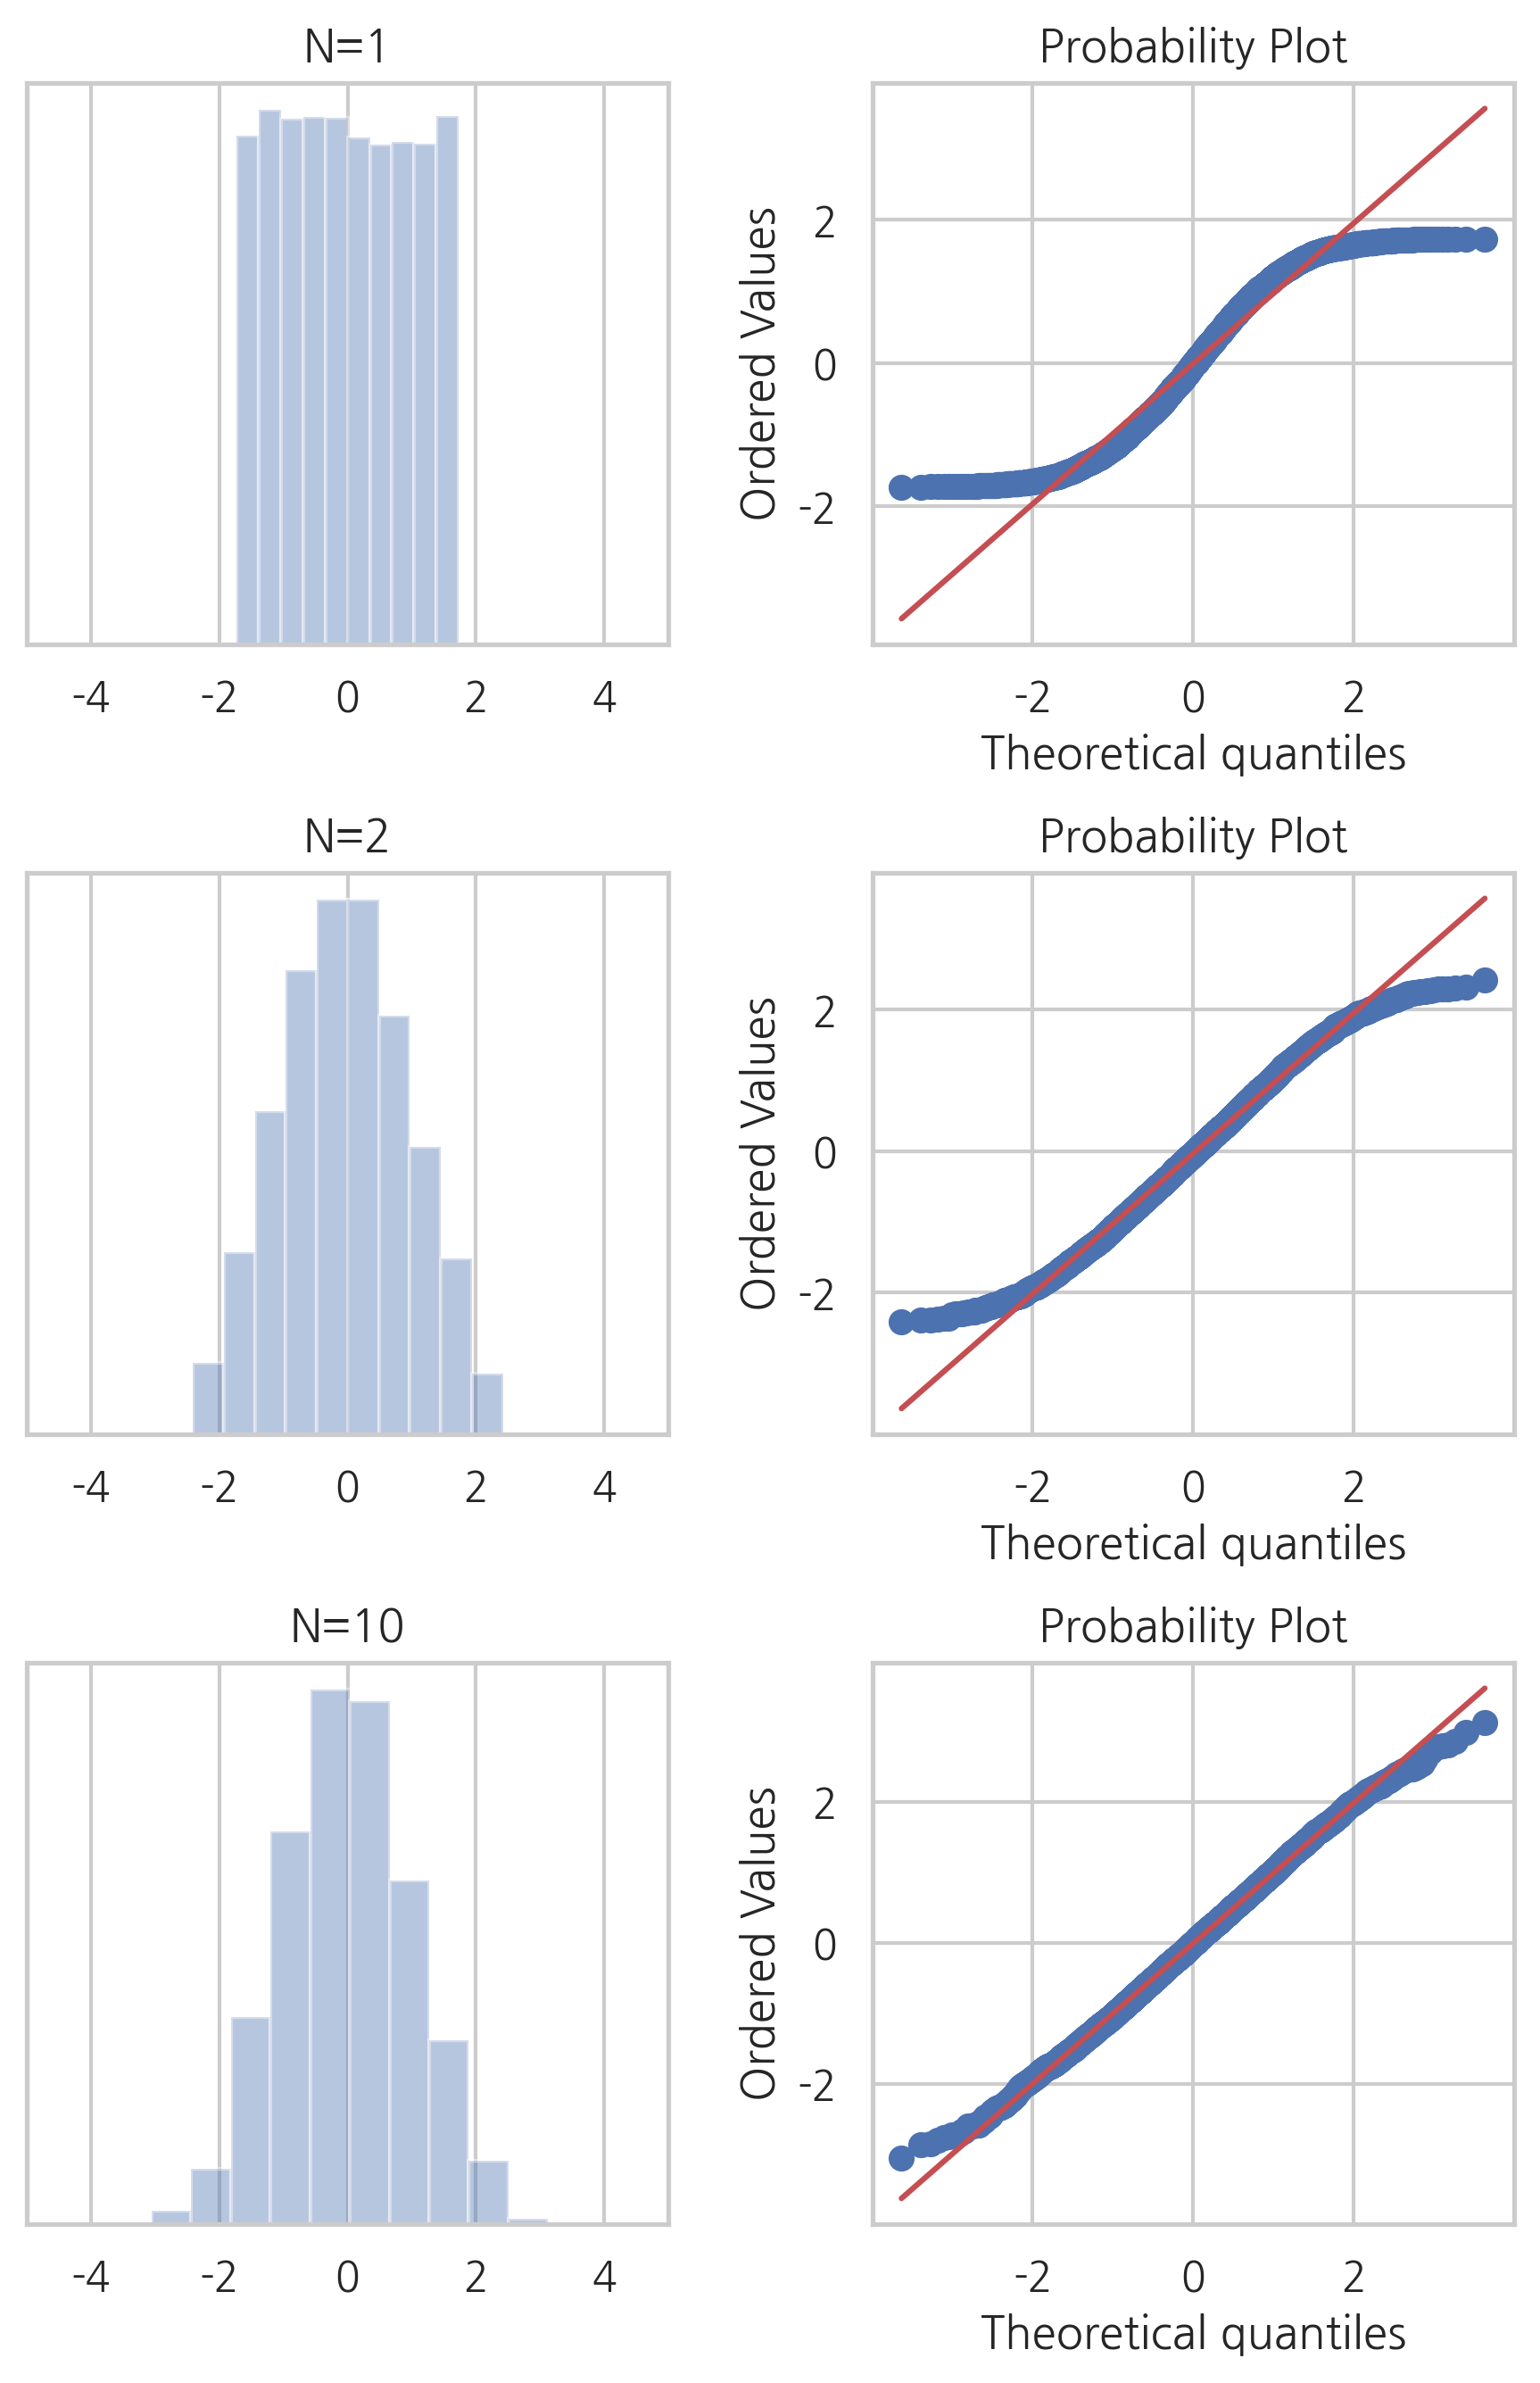

In [475]:
np.random.seed(0)
xx = np.linspace(-2,2,100)
plt.figure(figsize=(6,9))

for i,N in enumerate([1,2,10]) : 
    X = np.random.rand(5000,N) # 균등분포에서 표본 생성
    Xbar = (X.mean(axis=1)-0.5)*np.sqrt(12*N)
    ax = plt.subplot(3,2,2*i+1)
    sns.distplot(Xbar,bins=10,kde=False,)
    plt.xlim(-5,5)
    plt.yticks([])
    ax.set_title('N={0}'.format(N))
    plt.subplot(3,2,2*i+2)
    sp.stats.probplot(Xbar,plot=plt)
    
plt.tight_layout()
plt.show()

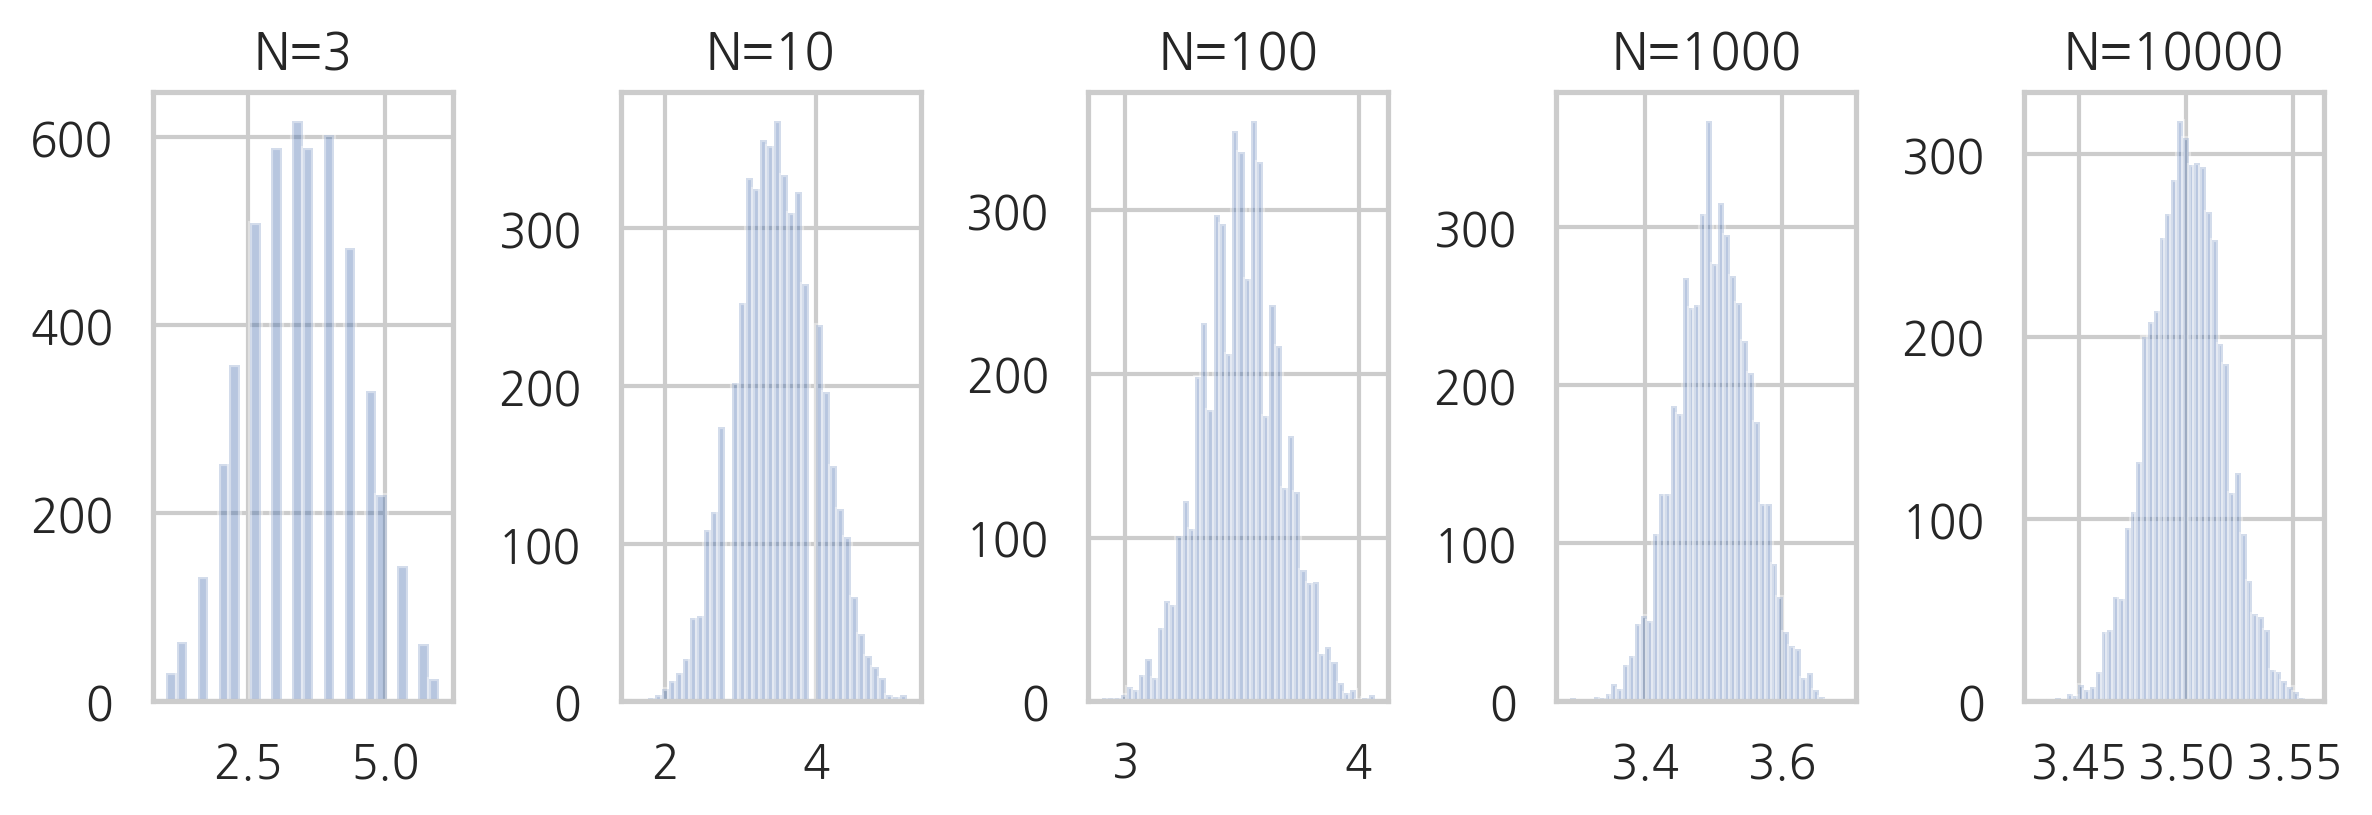

In [654]:
# 다시해보기 
def central_limit(n) : 
    list1 = []
    for i in range(5000) : 
        list1.append(np.random.randint(1,7,size=n).mean())
    sns.distplot(list1,kde=False)
    plt.title(f'N={n}')

    
plt.subplot(251)
central_limit(3)

plt.subplot(252)
central_limit(10)

plt.subplot(253)
central_limit(100)

plt.subplot(254)
central_limit(1000)

plt.subplot(255)
central_limit(10000)

plt.tight_layout()
plt.show()

# 중심극한 정리 시뮬레이션

# 주사위 던질 때 : 
# 주사위 N번 던져 나오는 표본평균의 분포는 N이 커질수록 정규분포에 근사한다. 
#### 전제 : 표본평균 표본갯수도 충분히 클 때,

<AxesSubplot:ylabel='Density'>

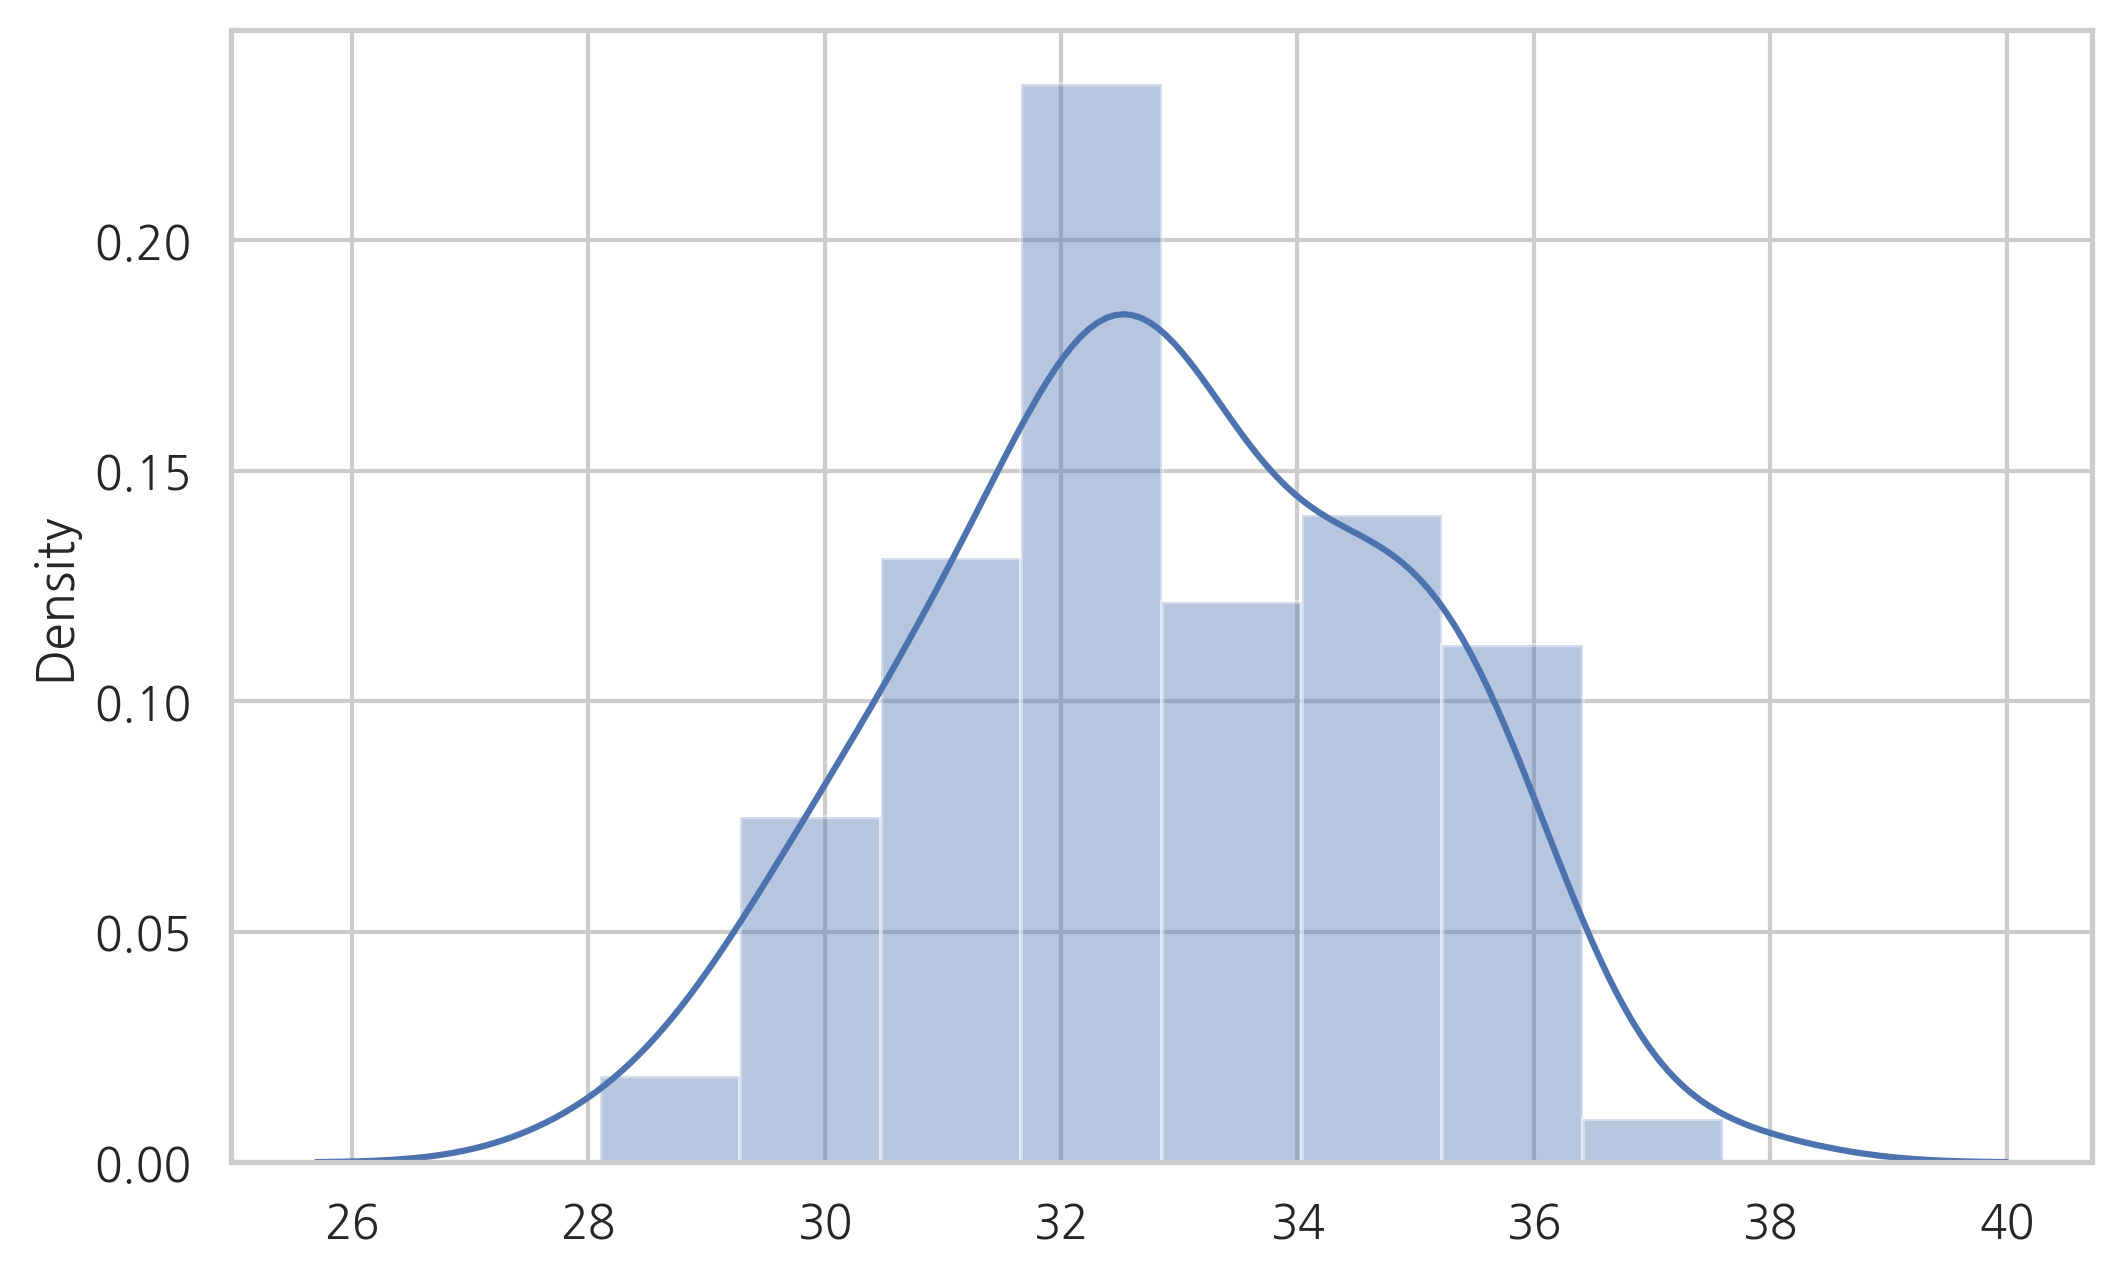

In [684]:
data = df[['다섯번째번호']].iloc[1:901]
lotto_data = data.values.reshape(90,10)
dist_data = lotto_data.mean(axis=1)
sns.distplot(dist_data)

<AxesSubplot:ylabel='Density'>

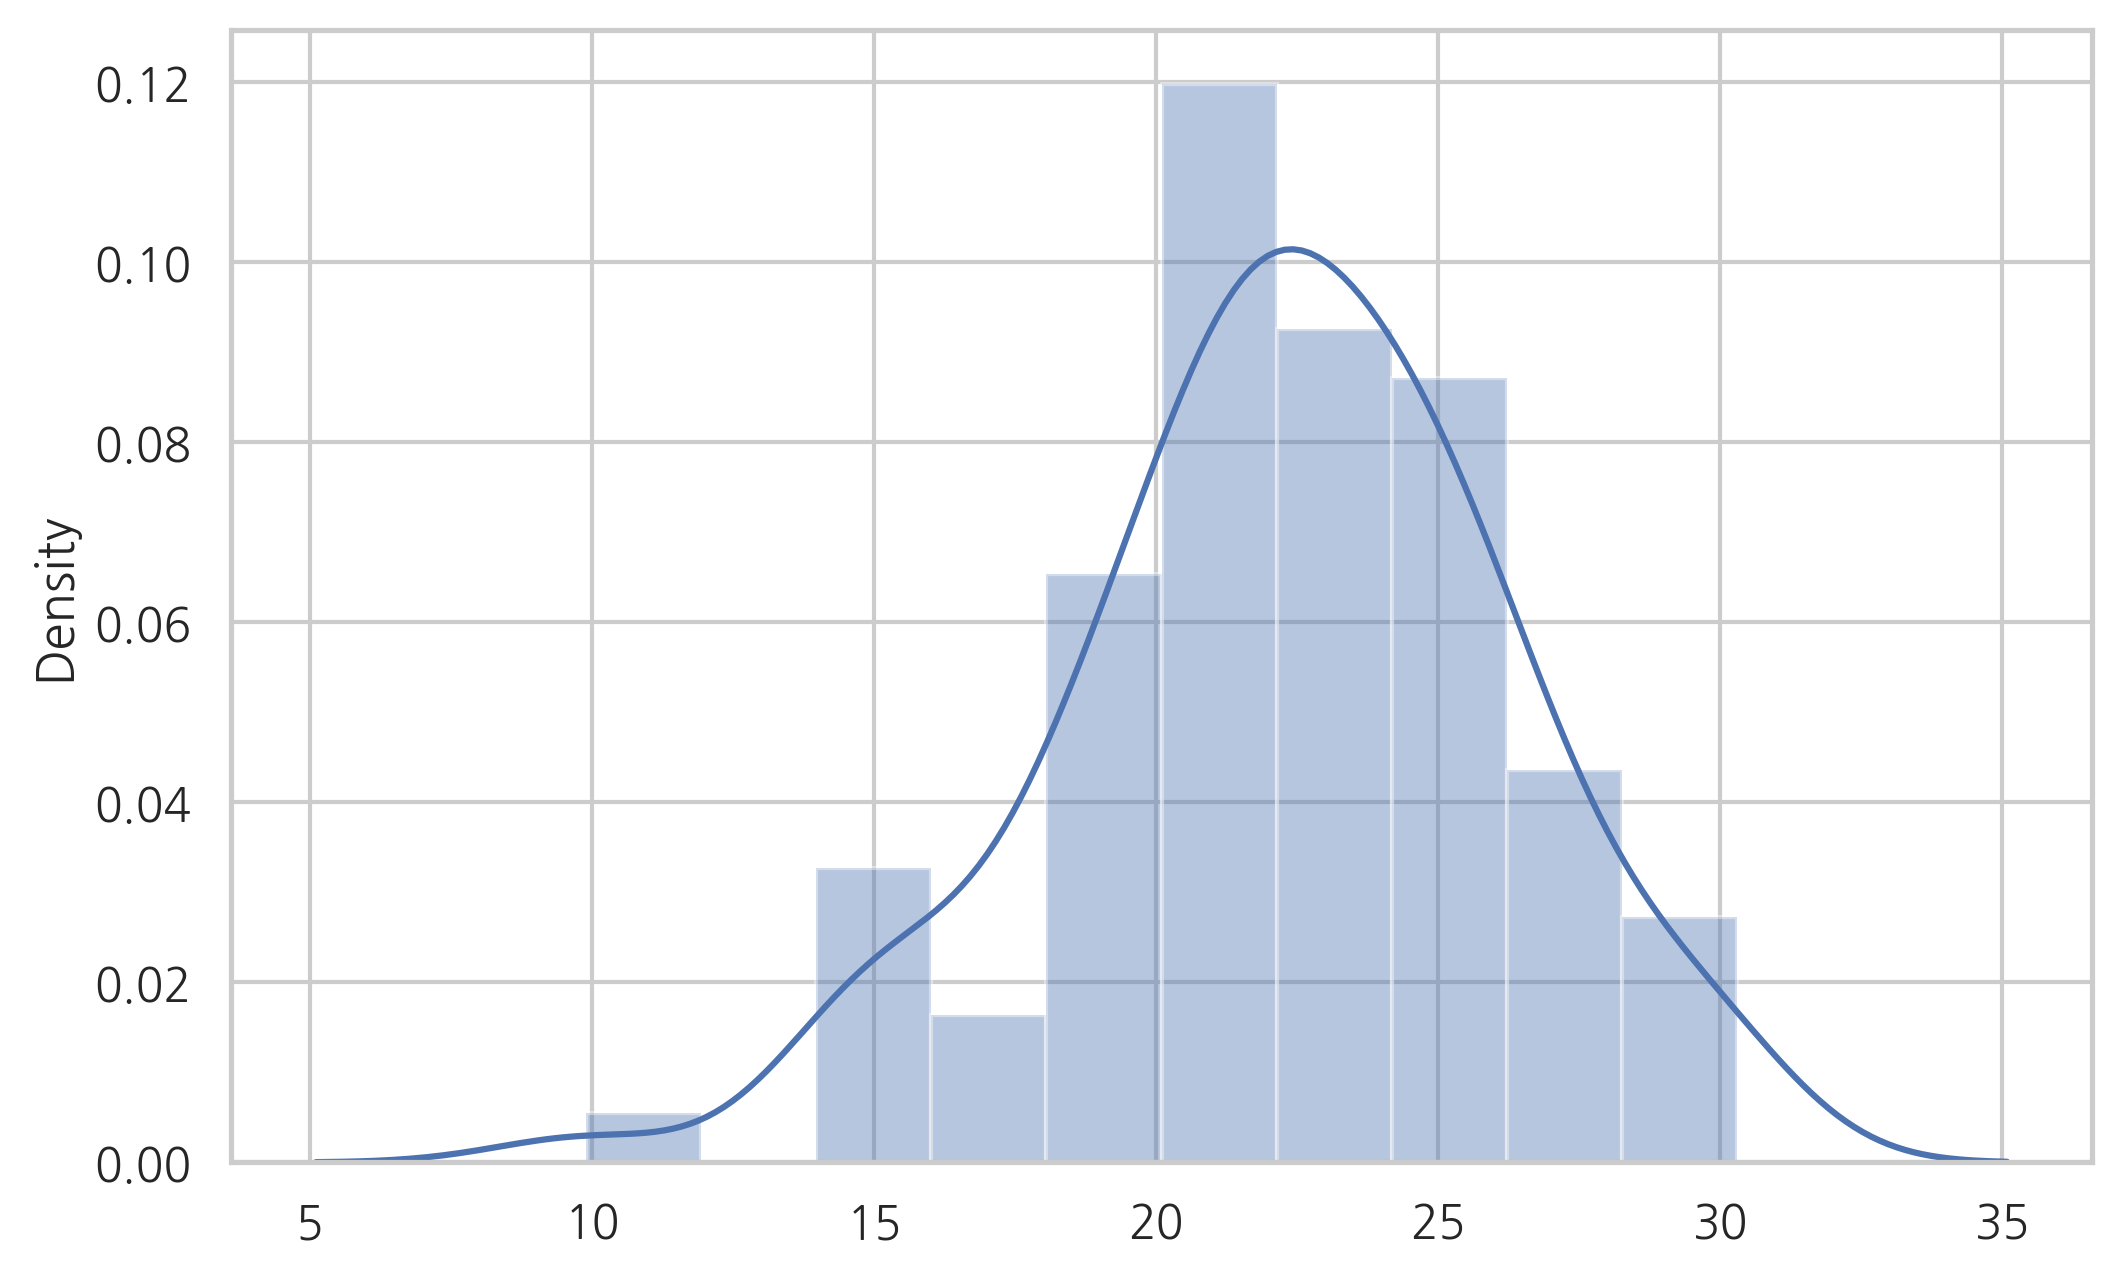

In [700]:
data = df[['보너스 번호']].iloc[1:901]
lotto_data = data.values.reshape(90,10)
dist_data = lotto_data.mean(axis=1)
sns.distplot(dist_data)

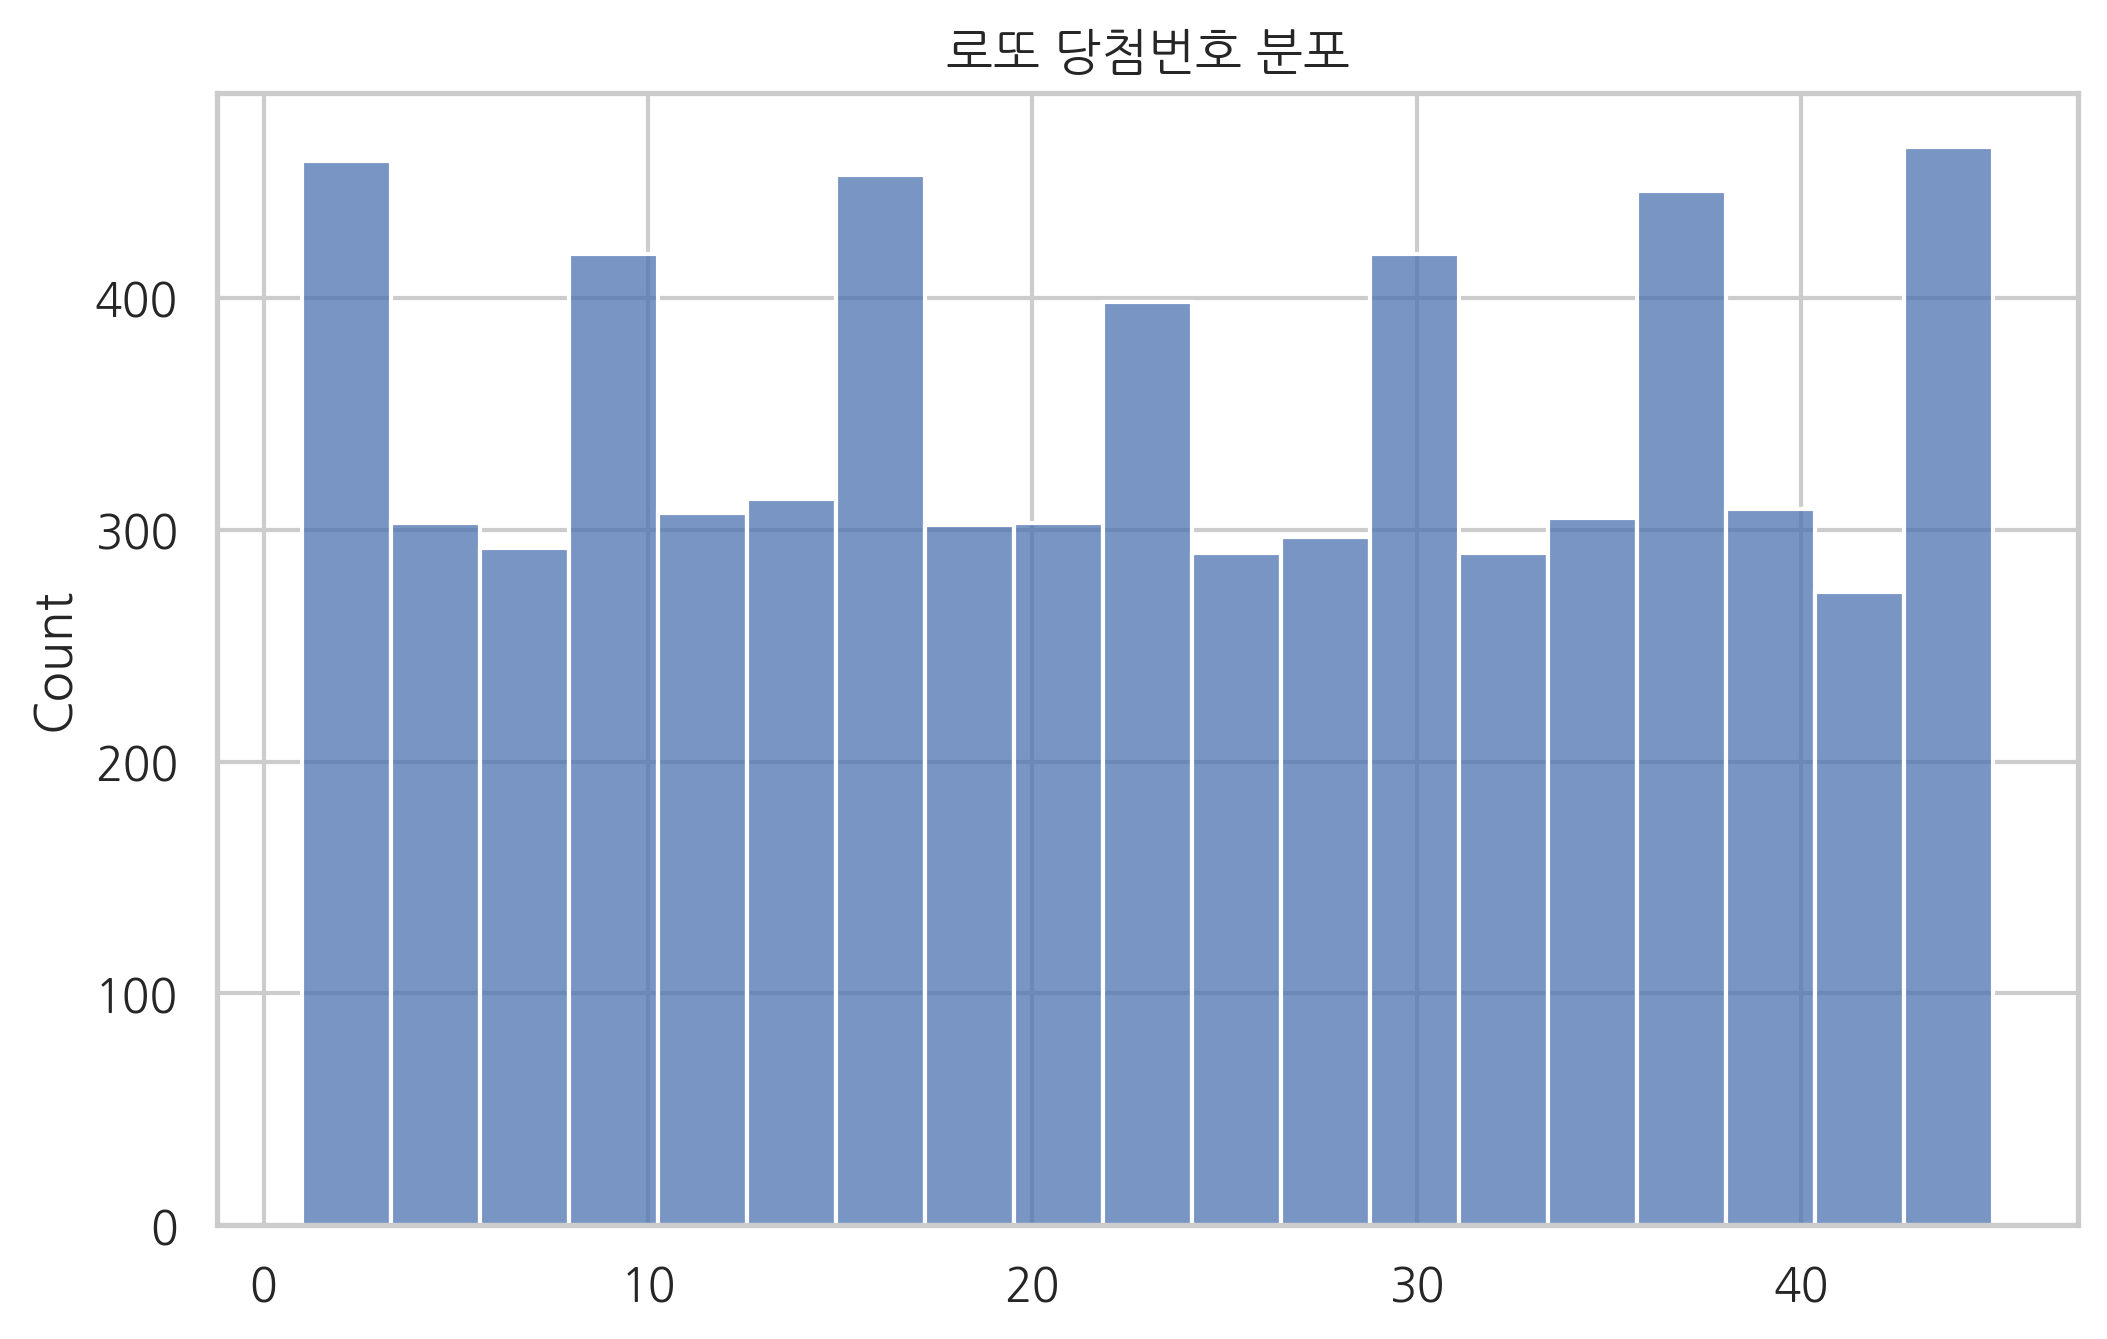

In [714]:
data = df.values.reshape(6643,1)
sns.histplot(data,legend=False)
plt.title('로또 당첨번호 분포')
plt.show()

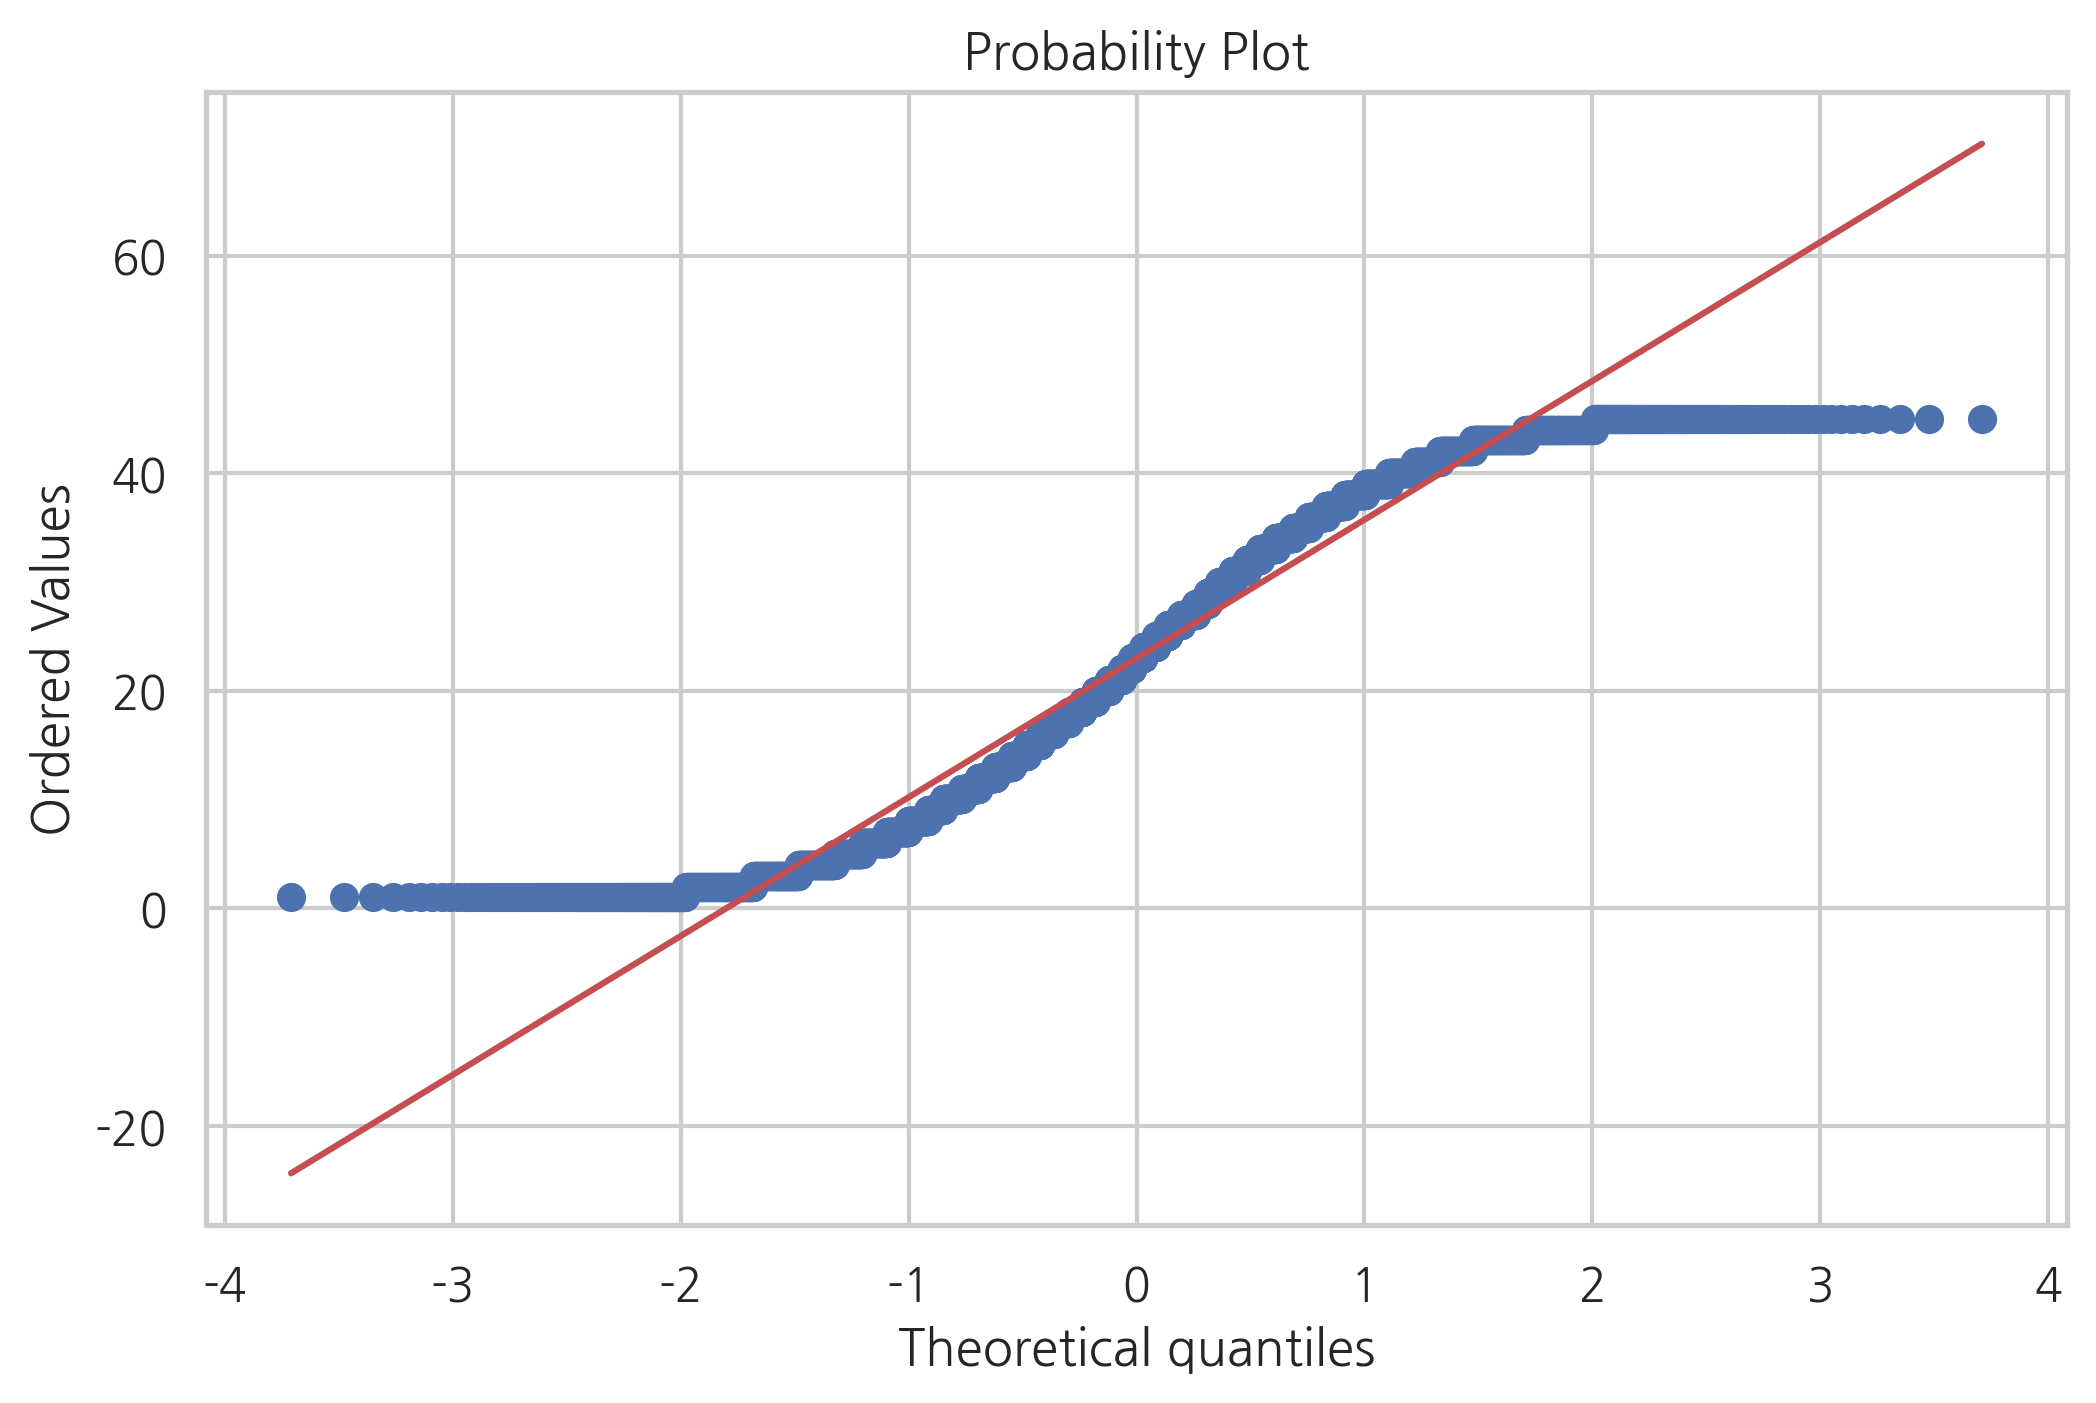

In [770]:
sp.stats.probplot(data,plot=plt)
plt.show()

# 균등분포라서 정규분포 따르지 않는다. 

<AxesSubplot:ylabel='Count'>

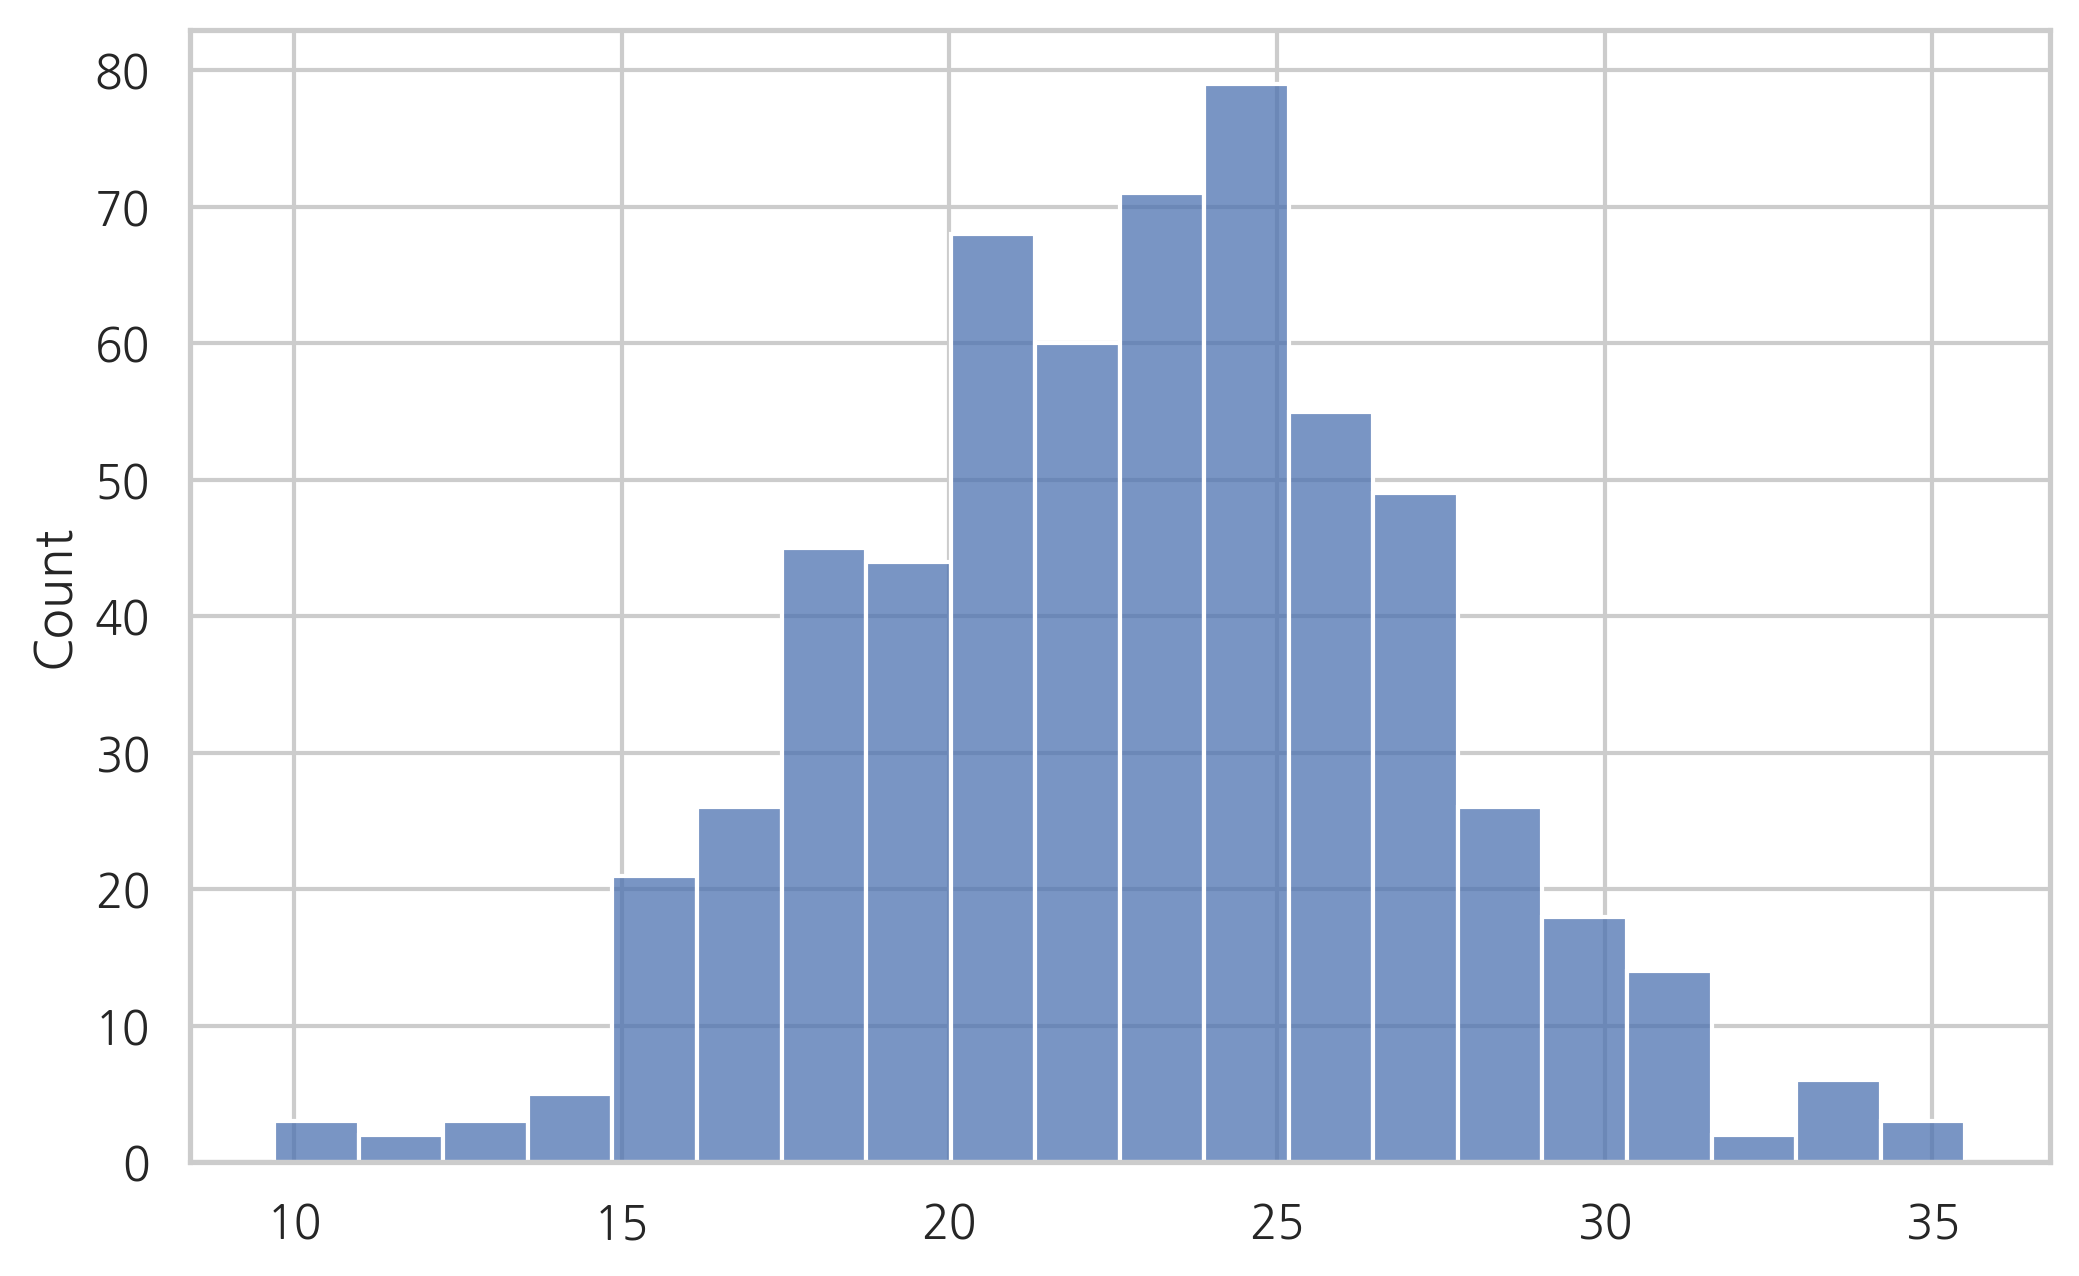

In [836]:
data2 = data[:6000] #6000
data2 = data2.reshape(600,10)
Xbar = data2.mean(axis=1)

sns.histplot(Xbar,kde=False)

# 중심극한정리에 따라, 표본평균분포가 정규분포를 근사하게 따른다. 

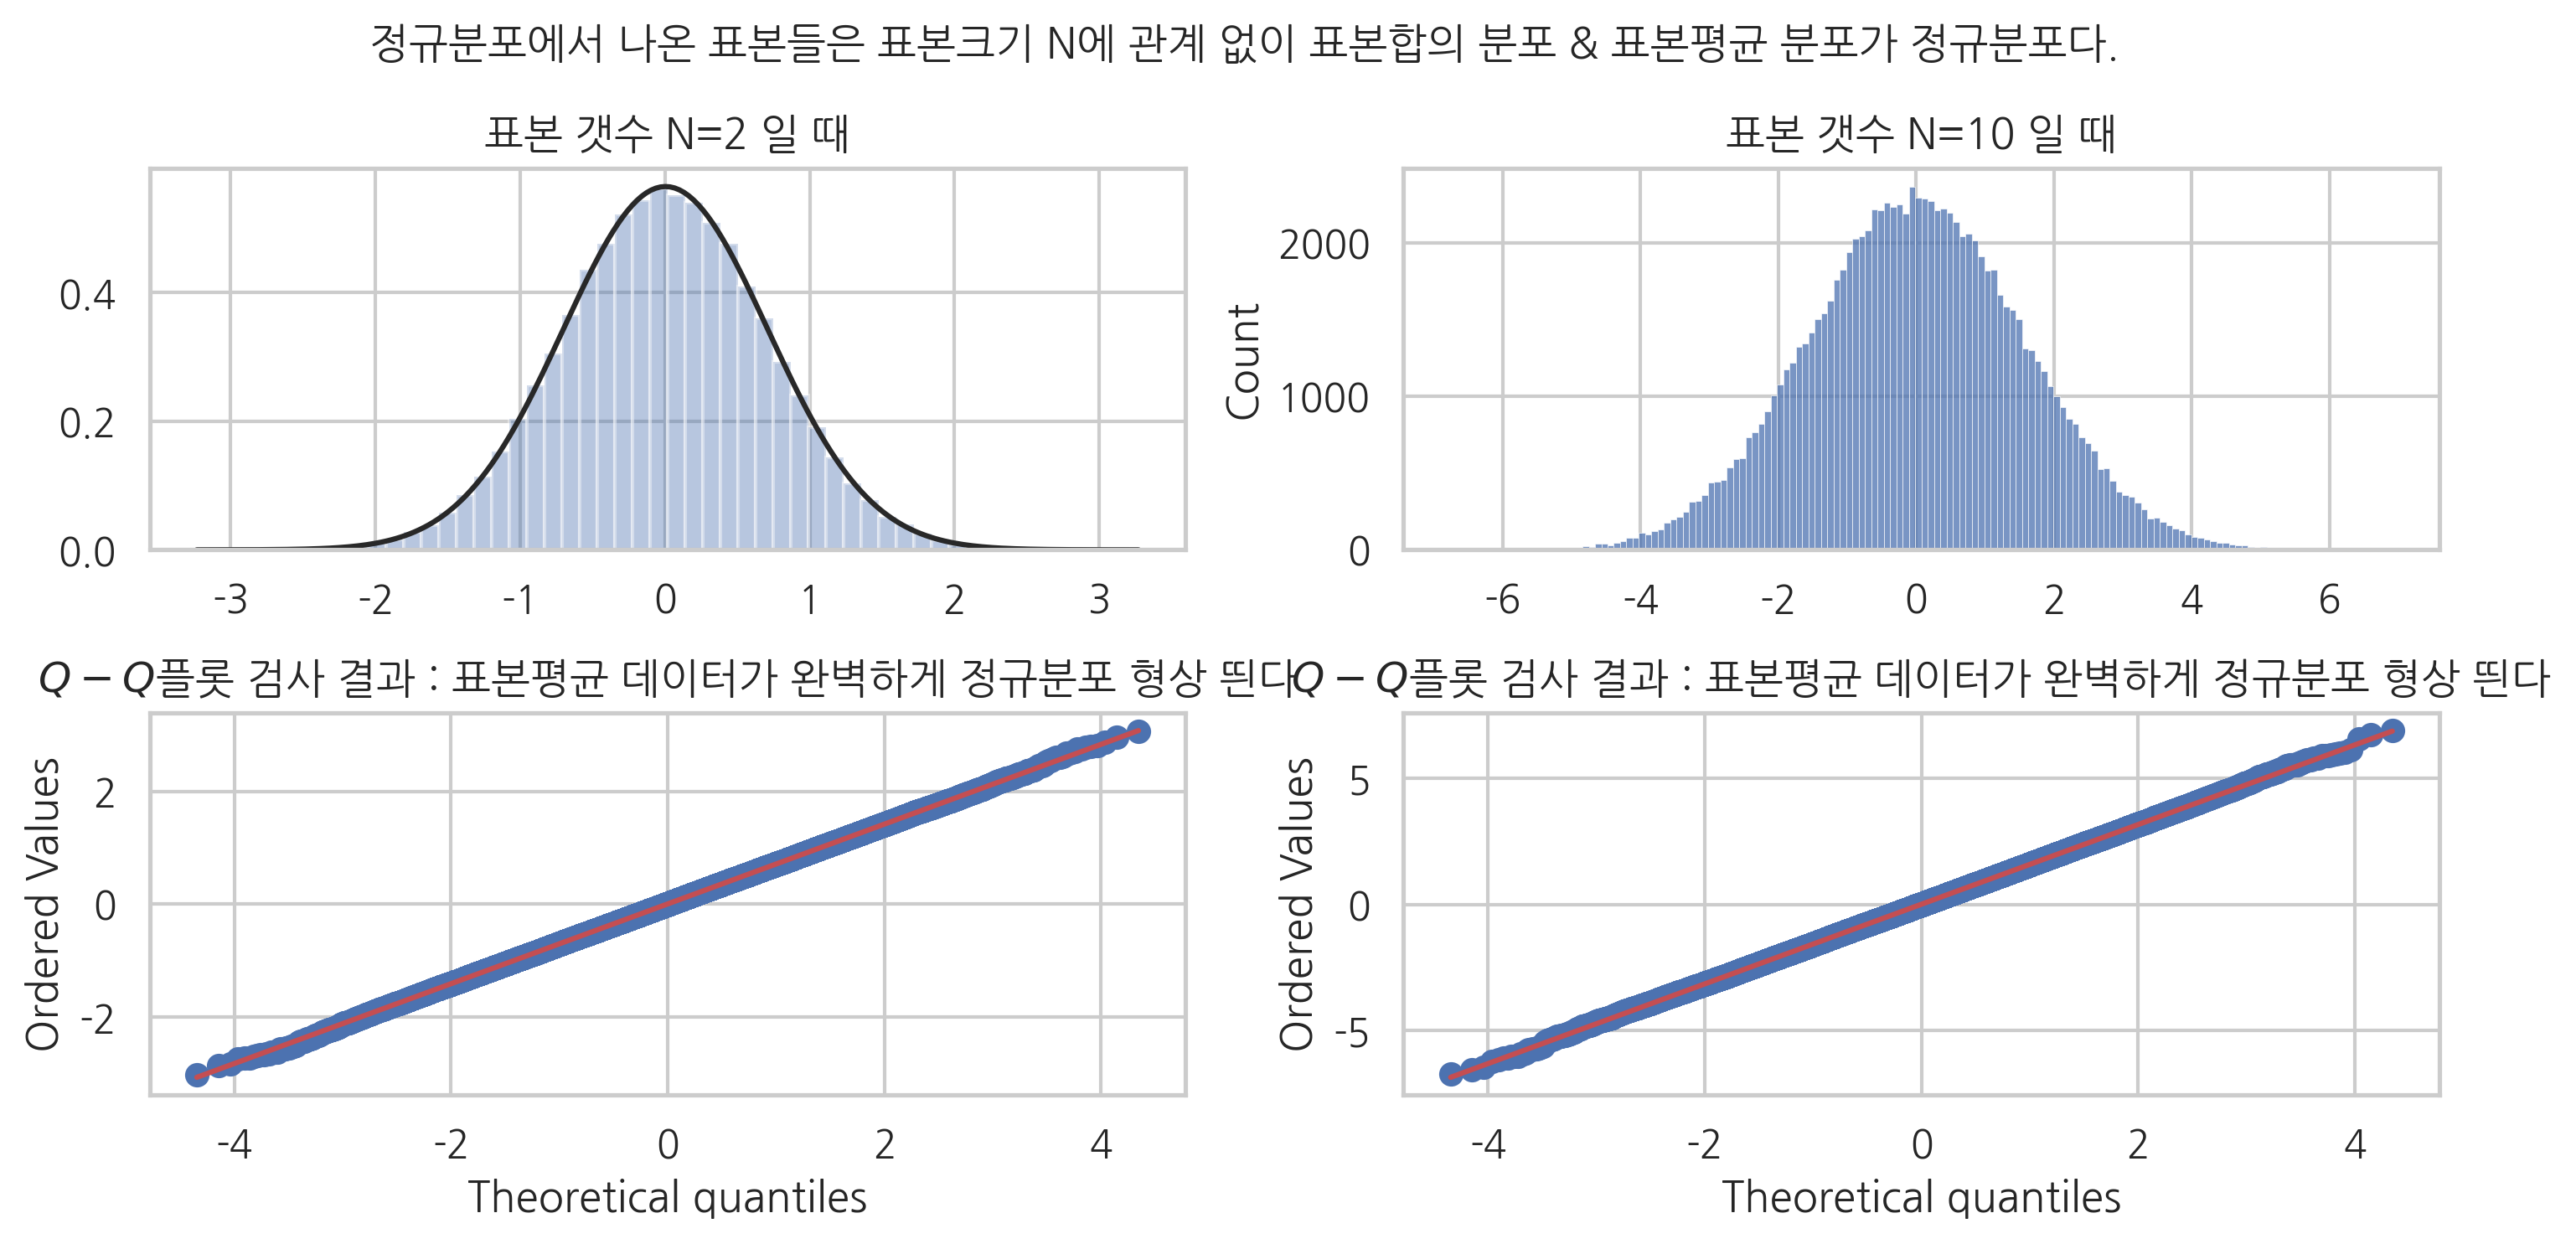

In [919]:
# 8.4.3 연습문제 
#1. 
np.random.seed(0)
data1 = (np.random.normal(size=(100000,2)).sum(axis=1))/2 
data2 = (np.random.normal(size=(100000,10)).sum(axis=1))/2

plt.figure(figsize=(10,5))
plt.subplot(221)
sns.distplot(data1,fit=sp.stats.norm,kde=False)
plt.title('표본 갯수 N=2 일 때')

plt.subplot(222)
sns.histplot(data2)
plt.title('표본 갯수 N=10 일 때')

plt.subplot(223)
sp.stats.probplot(data1,plot=plt)
plt.title('$Q-Q$플롯 검사 결과 : 표본평균 데이터가 완벽하게 정규분포 형상 띈다')

plt.subplot(224)
sp.stats.probplot(data2,plot=plt)
plt.title('$Q-Q$플롯 검사 결과 : 표본평균 데이터가 완벽하게 정규분포 형상 띈다')

plt.suptitle('정규분포에서 나온 표본들은 표본크기 N에 관계 없이 표본합의 분포 & 표본평균 분포가 정규분포다.')
plt.tight_layout()
plt.show()